# Seminário: Detecção de Comentários Ofensivos com o Uso do Dataset HateBR
**Autores:** Daniel Pedro Elias dos Santos, Gabriel Neves Silveira, Gustavo Camerino de Carvalho

Este seminário tem como objetivo apresentar a proposta de um modelo de Machine Learning destinado à detecção de comentários ofensivos e discursos de ódio em postagens de políticos brasileiros no Instagram. A pesquisa utilizará o dataset HateBR, que contém aproximadamente 7.000 comentários rotulados, e explorará diferentes algoritmos, sendo o Random Forest, Gradient Boosting, XGBoost, LightGBM e CatBoost para classificar o conteúdo por níveis de ofensividade e tipos de discurso de ódio. O intuito é identificar o modelo mais eficaz, analisando métricas de desempenho como acurácia, precisão, recall e F1-score, além de discutir suas implicações na moderação de conteúdos nas redes sociais.

## Objetivo do Seminário

O principal objetivo deste seminário é desenvolver um modelo de Machine Learning capaz de identificar automaticamente comentários ofensivos e discursos de ódio em português (nível e tipo de ofensa). Com o aumento do uso das redes sociais, tornou-se mais comum a disseminação de conteúdo ofensivo, especialmente em contextos políticos. Para lidar com esse desafio, este trabalho foca em criar uma solução que possa ajudar na moderação e manutenção de um ambiente digital mais seguro e saudável.

A proposta é utilizar o dataset **HateBR**, que contém aproximadamente 7.000 comentários do Instagram de políticos brasileiros, rotulados em diferentes categorias e níveis de ofensa. Este dataset é uma ferramenta valiosa para treinar modelos que consigam diferenciar entre linguagem ofensiva e comentários não ofensivos, além de classificar discursos de ódio em grupos como racismo, homofobia, entre outros.

Serão avaliados diferentes modelos de Machine Learning, incluindo algoritmos tradicionais e modernos, como **Random Forest, Gradient Boosting, XGBoost, LightGBM e CatBoost**. A eficácia de cada modelo será comparada usando métricas como acurácia, precisão, recall e F1-score, com o intuito de determinar a melhor abordagem para a classificação dos comentários.

## Descrição do Dataset

O dataset utilizado neste projeto é o **HateBR**, um corpus pioneiro de grande escala, anotado por especialistas, com comentários do Instagram em português brasileiro. Ele foi criado para facilitar a detecção de linguagem ofensiva e discurso de ódio na web e nas redes sociais, sendo uma ferramenta relevante para pesquisas na área de **Processamento de Linguagem Natural (NLP)**.

O corpus do **HateBR** foi coletado a partir de comentários em postagens de políticos brasileiros e passou por uma rigorosa anotação manual feita por especialistas. O dataset é composto por aproximadamente **7.000 documentos** que foram anotados em três camadas distintas:
- **Classificação Binária**: Classificação de comentários como ofensivos (True) ou não ofensivos (False).
- **Nível de Ofensividade**: Anotação dos comentários em quatro níveis: altamente ofensivo (3), moderadamente ofensivo (2), ligeiramente ofensivo (1) e não ofensivo (0).
- **Grupos de Discurso de Ódio**: Classificação dos comentários em nove categorias, incluindo xenofobia, racismo, homofobia, sexismo, intolerância religiosa, partidismo, apologia à ditadura, antissemitismo e gordofobia.

Cada comentário foi anotado por **três diferentes especialistas**, e o dataset obteve uma alta concordância entre eles, garantindo a qualidade das anotações. Além disso, experimentos de baseline mostraram que o corpus permitiu alcançar um **F1-score de 85%**, superando modelos existentes na literatura para a língua portuguesa.

### Estrutura dos Dados
Os campos presentes no dataset incluem:
- **instagram_comments**: O texto do comentário. (Foi utilziado)
- **offensive_language**: Indica se o comentário é ofensivo (True) ou não (False). (Não foi utilizado)
- **offensiveness_levels**: Nível de ofensividade atribuído (de 0 a 3). (Foi utilizado)
- **Categorias de Discurso de Ódio**: Indicadores de presença ou ausência de diferentes tipos de ódio (e.g., racismo, homofobia, xenofobia). (Tirando Xenofobia, foi utilizado)
- **Anotações de Especialistas**: Resultados individuais das anotações de três especialistas sobre a presença de discurso de ódio. (Não foi utilizado)

### Divisão dos Dados
Para garantir um balanceamento adequado entre as classes, foi utilizada uma técnica de estratificação de dados multilabel para dividir o dataset em **treinamento**, **validação** e **teste**:
- **Treinamento**: 4.480 comentários. (Foi utilizado)
- **Validação**: 1.120 comentários. (Não foi utilizado)
- **Teste**: 1.400 comentários. (Foi utilizado)

## Pré-processamento e Processamento dos dados

Instalando Bibliotecas

**Datasets:** Essa biblioteca foi desenvolvida pelo Hugging Face, facilitando o acesso a datasets padronizados para Machine Learning e Processamento de Linguagem Natural (NLP). Nesse caso é responsável pelo acesso ao dataset HateBR.

**Keras:** Keras é uma biblioteca de código aberto que fornece uma interface de alto nível para a construção e treinamento de modelos de Deep Learning. Ela é integrada ao TensorFlow, permitindo o desenvolvimento intuitivo de redes neurais.

**TensorFlow:** TensorFlow é uma biblioteca amplamente utilizada para computação numérica e deep learning, proporcionando suporte robusto para a criação de modelos de Machine Learning.

**UMAP-learn:** UMAP (Uniform Manifold Approximation and Projection) é uma técnica de redução de dimensionalidade que ajuda a visualizar dados de alta dimensionalidade em espaços de menor dimensão. Essa biblioteca é especialmente útil para a análise exploratória dos vetores gerados pelo Word2Vec, permitindo que padrões e distribuições dos dados sejam visualizados de forma mais clara e compreensível. O uso do UMAP facilita a interpretação dos resultados e contribui para uma melhor compreensão dos comentários analisados.

**Gcsfs:** Gcsfs é uma biblioteca que permite o acesso e a manipulação de sistemas de arquivos do Google Cloud Storage (GCS). Sendo útil em projetos que envolvem grandes volumes de dados ou quando se trabalha com datasets armazenados na nuvem, sendo, nesse caso usada com a biblioteca **Datasets**.

In [ ]:
!pip install datasets keras tensorflow umap-learn gcsfs

INFO: pip is looking at multiple versions of gcsfs to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
  Attempting uninstall: gcsfs
    Found existing installation: gcsfs 2024.10.0
    Uninstalling gcsfs-2024.10.0:
      Successfully u

Importando Bibliotecas

In [ ]:
import datasets  # Utilizada para carregar datasets padronizados de Machine Learning, nesse caso vai ser usado para carregar o HateBR.
import matplotlib.pyplot as plt  # Utilizada para criar e customizar gráficos, essencial para visualização de dados e resultados.
import numpy as np  # Usada para realizar operações eficientes em arrays e manipulação de dados numéricos de forma vetorizada.
# import tqdm  # Exibe uma barra de progresso para loops, ajudando a monitorar o tempo de execução de processos longos.
import string  # Fornece funções e constantes para manipulação de strings, como remoção de pontuação.
import pandas as pd  # Utilizada para manipulação e análise de dados em estruturas de DataFrame.

# from gensim.models import *  # Biblioteca de NLP para carregar e treinar modelos de word embeddings, sendo usado aqui para o Word2Vec.


import nltk  # Biblioteca de NLP para processamento de texto, incluindo tokenização e análise linguística.
from nltk.tokenize import word_tokenize  # Método específico para dividir texto em palavras (tokens).

# O punkt usa um algoritmo não supervisionado para dividir textos em sentenças, reconhecendo abreviações, colaborações e palavras iniciais.
nltk.download('punkt')  # Faz o download do pacote 'punkt', necessário para a tokenização de texto.

import tensorflow  # Biblioteca de deep learning para construir e treinar modelos de Machine Learning, usada aqui para importar Keras.
from tensorflow.keras.preprocessing.text import Tokenizer  # Usada para converter textos em sequências de tokens numéricos.
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Utilizada para padronizar o comprimento das sequências, preenchendo-as com zeros se necessário.

from gensim.models import KeyedVectors  # Usado para carregar e manipular modelos pré-treinados de word embeddings, como vetores do Word2Vec.

# Define uma semente aleatória para garantir os mesmos resultados entre execuções.
tensorflow.random.set_seed(42)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Baixando o Dataset HateBR, especificamente os conjuntos de **treino** e de **teste**.

In [ ]:
train_dataset, test_dataset = datasets.load_dataset("ruanchaves/hatebr", split=["train", "test"]) # Carrega o dataset

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/6.09k [00:00<?, ?B/s]

hatebr.py:   0%|          | 0.00/6.40k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/264k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/68.2k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/81.0k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/4480 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1120 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1400 [00:00<?, ? examples/s]

Vendo os 10 primeiros comentarios

In [ ]:
train_dataset['instagram_comments'][:10] # Pega os 10 primeiros comentarios do dataset, apenas para vizualizacao

['este lixo ...',
 'Comunista safada...',
 'Comunista lixo!',
 'Esquerdista.',
 'Oportunista essa corrupta.Agora todos os Comunistas querem se fazer de vítimas.',
 'Plano da esquerda foi é e será sempre críticar não nunca teve um plano de governo único plano era como roubar .',
 'O problema dela é que a tetinha secou',
 'É uma cara de pau mesmo... 😡',
 'Joga uma carteira de trabalho que correm todos, na verdade não gostam de trabalhar só sabem roubar o brasil',
 'BACHELETA DA TRETA E MUTRETA CHILENA..CANALHA SAPATONA.. BICHELETA..',
 'Noventa comunista',
 'Óleo de peroba pra lustrar a cara de pau!',
 'Aí a ganância falou mais alto... corrupta!',
 'Devolve o dinheiro roubado via OAS...',
 'Isso não passa de uma mera oportunista! #michelebachelet #oas não passa de uma múmia esquerdista ainda em atividade minha querida @carla.zambelli . Obrigado pelas informações de sempre 🇧🇷💙',
 'Q mulher ordinária',
 'Vagabunda',
 'Deve ter pena dela quando descobrir os podre dela essa imoral',
 'Horror

Fazendo o download, extração do arquivo zip e carregamento dos embeddings do **Word2Vec** terinado em português pelo NILC (Núcleo Interinstitucional de Linguística Computacional do ICMC - USP), usando a biblioteca gensim.

In [ ]:
# Baixa o arquivo
!wget -O "w2v.zip" "http://143.107.183.175:22980/download.php?file=embeddings/word2vec/skip_s100.zip"

# Extrai o arquivo
!unzip "w2v.zip"

# Carrega os pesos com a biblioteca gensim
word2vec = KeyedVectors.load_word2vec_format("skip_s100.txt")

# Define o tamanho dos embeddings, nesse caso apenas 100 dimensoes, pois sao essas as dimensoes do arquivo baixado
EMB_DIM = 100

--2024-11-05 02:29:32--  http://143.107.183.175:22980/download.php?file=embeddings/word2vec/skip_s100.zip
Connecting to 143.107.183.175:22980... connected.
HTTP request sent, awaiting response... 200 OK
Length: 337179242 (322M) [application/octet-stream]
Saving to: ‘w2v.zip’

w2v.zip             100%[===================>] 321.56M  11.2MB/s    in 29s     

2024-11-05 02:30:01 (10.9 MB/s) - ‘w2v.zip’ saved [337179242/337179242]

Archive:  w2v.zip
  inflating: skip_s100.txt           


O Que são os Embeddings e Como Foram Utilizados no Seminário

**Embeddings e Word Embeddings**

No contexto de Processamento de Linguagem Natural (NLP), *embeddings* são representações numéricas de objetos do mundo real que sistemas de Machine Learning e inteligência artificial utilizam para compreender domínios de conhecimento complexos de maneira semelhante aos seres humanos. *Word embeddings*, em particular, são uma forma de representar palavras como vetores em um espaço multidimensional, onde a distância e a direção entre os vetores refletem a similaridade e as relações entre as palavras correspondentes, permitindo que modelos de aprendizado de máquina capturem semelhanças semânticas e processem textos de forma mais eficaz

**Word2Vec e a Implementação Utilizada**

O *Word2Vec* é um modelo popular de geração de *word embeddings* que transforma palavras em vetores, de tal forma que palavras com significados semelhantes têm representações vetoriais próximas. Existem duas principais arquiteturas do *Word2Vec*: CBOW (Continuous Bag of Words) e SKIP-GRAM. A abordagem *SKIP-GRAM*, que foi utilizada aqui, é projetada para prever palavras contextuais a partir de uma palavra central, capturando melhor as relações semânticas em grandes conjuntos de dados.

Neste projeto, foi utilizado o *Word2Vec* com 100 dimensões, treinado a partir dos [NILC-Embeddings](http://nilc.icmc.usp.br/nilc/index.php/repositorio-de-word-embeddings-do-nilc). Os NILC-Embeddings são um conjunto de vetores de palavras voltados para a Língua Portuguesa, construídos a partir de um grande conjunto de dados de português do Brasil e português europeu, abrangendo 17 córpus (conjunto de dados de texto que servem de base para treinar modelos de NLP) diferentes e mais de 1,3 bilhão de tokens. Essa escolha permite uma representação detalhada e contextual das palavras, especialmente adaptada para tarefas em português.

### Pré-Processamento
Realizando o **pré-processamento** dos dados

Aqui é feito a preparação dos dados para que possam ser usados no treinamento do modelo. Assim o código realiza:
- **Separação do texto e rótulo**: Os comentários e seus respectivos rótulos são extraídos do conjunto de dados de treino e teste (nível de ofensa e tipo de ofensa).
- **Conversão para mínusculo**: Todos os textos são convertidos para minúsculo, para uma melhor padronização dos dados.
- **Remoção de pontuação**: A pontuação é eliminada para focar nas palavras que compõem os comentários.
- **Tokenização**: O texto é dividido em tokens (palavras), que servirão como entrada para as próximas etapas de processamento.
- **Formatação em DataFrames**: Os dados são estruturados em `DataFrames` do `pandas` para facilitar a manipulação e visualização.

In [ ]:
train_data = []  # Vetor para armazenar os dados de treino
test_data = []   # Vetor para armazenar os dados de teste

# Trata conjunto de treino
for data in train_dataset:
    # Separa a entrada (text) dos rotulos (y)
    text = data['instagram_comments']
    y_level = data['offensiveness_levels']  # Nivel de ofensa (0 a 3)

    # Transforma o texto em caixa baixa (minusculo)
    s = str(text).lower()

    # Remove a pontuacao
    table = str.maketrans({key: None for key in string.punctuation.replace("'", "")})
    s = s.translate(table)
    s = s.translate(str.maketrans({"'": " "}))

    # Cria um dicionário para armazenar os tipos de ofensa
    y_types = {
        'antisemitism': data['antisemitism'],
        'apology_for_the_dictatorship': data['apology_for_the_dictatorship'],
        'fatphobia': data['fatphobia'],
        'homophobia': data['homophobia'],
        'partyism': data['partyism'],
        'racism': data['racism'],
        'religious_intolerance': data['religious_intolerance'],
        'sexism': data['sexism'],
        'xenophobia': data['xenophobia']
    }

    # Adiciona ao vetor de entradas pre-processadas (input, nível de ofensa e tipos de ofensa)
    train_data.append([s, y_level] + list(y_types.values()))

# Trata conjunto de teste
for data in test_dataset:
    # Separa a entrada (text) dos rotulos (y)
    text = data['instagram_comments']
    y_level = data['offensiveness_levels']  # Nivel de ofensa (0 a 3)

    # Transforma o texto em caixa baixa (minusculo)
    s = str(text).lower()

    # Remove a pontuacao
    table = str.maketrans({key: None for key in string.punctuation.replace("'", "")})
    s = s.translate(table)
    s = s.translate(str.maketrans({"'": " "}))

    # Cria um dicionário para armazenar os tipos de ofensa
    y_types = {
        'antisemitism': data['antisemitism'],
        'apology_for_the_dictatorship': data['apology_for_the_dictatorship'],
        'fatphobia': data['fatphobia'],
        'homophobia': data['homophobia'],
        'partyism': data['partyism'],
        'racism': data['racism'],
        'religious_intolerance': data['religious_intolerance'],
        'sexism': data['sexism'],
        'xenophobia': data['xenophobia']
    }

    # Adiciona ao vetor de entradas pre-processadas (input, nível de ofensa e tipos de ofensa)
    test_data.append([s, y_level] + list(y_types.values()))

# Transforma os vetores em DataFrames
train_data = pd.DataFrame(train_data, columns=['input', 'label_level',
                                               'antisemitism',
                                               'apology_for_the_dictatorship',
                                               'fatphobia',
                                               'homophobia',
                                               'partyism',
                                               'racism',
                                               'religious_intolerance',
                                               'sexism',
                                               'xenophobia'])

test_data = pd.DataFrame(test_data, columns=['input', 'label_level',
                                             'antisemitism',
                                             'apology_for_the_dictatorship',
                                             'fatphobia',
                                             'homophobia',
                                             'partyism',
                                             'racism',
                                             'religious_intolerance',
                                             'sexism',
                                             'xenophobia'])

# Aplica o tokenizador nas entradas (input)
train_data['input'] = train_data['input'].apply(lambda x: word_tokenize(x, language="portuguese"))
test_data['input'] = test_data['input'].apply(lambda x: word_tokenize(x, language="portuguese"))

Vizualizando as 10 primeiras entradas dos dataframes `train_data` e `test_data` pré-processados

A coluna input possui a lista de tokens em linguagem natural, a coluna label_level armazena a resposta de cada amostra em forma de classificação categórica, representando o nível de ofensa associado a cada comentário, já a coluna label_types contém as classificações referentes aos tipos de ofensa identificados nos comentários, como racismo, homofobia e outros.

In [ ]:
train_data.head(10)

,input,label_level,antisemitism,apology_for_the_dictatorship,fatphobia,homophobia,partyism,racism,religious_intolerance,sexism,xenophobia
0,"[este, lixo]",1,False,False,False,False,False,False,False,False,False
1,"[comunista, safada]",2,False,False,False,False,True,False,False,True,False
2,"[comunista, lixo]",1,False,False,False,False,True,False,False,False,False
3,[esquerdista],2,False,False,False,False,True,False,False,False,False
4,"[oportunista, essa, corruptaagora, todos, os, ...",3,False,False,False,False,True,False,False,False,False
5,"[plano, da, esquerda, foi, é, e, será, sempre,...",2,False,False,False,False,True,False,False,False,False
6,"[o, problema, dela, é, que, a, tetinha, secou]",2,False,False,False,False,False,False,False,False,False
7,"[é, uma, cara, de, pau, mesmo, 😡]",3,False,False,False,False,False,False,False,False,False
8,"[joga, uma, carteira, de, trabalho, que, corre...",1,False,False,False,False,False,False,False,False,False
9,"[bacheleta, da, treta, e, mutreta, chilenacana...",3,False,False,False,True,False,False,False,False,False


In [ ]:
test_data.head(10)

,input,label_level,antisemitism,apology_for_the_dictatorship,fatphobia,homophobia,partyism,racism,religious_intolerance,sexism,xenophobia
0,"[mais, um, lixo]",1,False,False,False,False,False,False,False,False,False
1,"[essa, mulher, é, doentepilantra]",3,False,False,False,False,False,False,False,False,False
2,"[vagabunda, comunista, mentirosa, o, povo, chi...",3,False,False,False,False,True,False,False,True,False
3,"[besta, quadrada]",2,False,False,False,False,False,False,False,False,False
4,[hipocritas],2,False,False,False,False,False,False,False,False,False
5,"[quem, tem, pena, é, galinha, mas, ela, é, uma...",3,False,False,False,False,False,False,False,True,False
6,"[mande, essa, bachelet, plantar, batata, no, a...",3,False,False,False,False,False,False,False,False,False
7,"[cara, de, pau]",3,False,False,False,False,False,False,False,False,False
8,"[porque, é, uma, bandida]",2,False,False,False,False,False,False,False,False,False
9,"[tudo, igual, só, pensam, no, próprio, rabo]",2,False,False,False,False,False,False,False,False,False


### Visualizando os Words Embeddings (do modelo Word2Vec) com UMAP
Visualizar as relações semânticas entre palavras no conjunto de dados sobre discurso de ódio, utilizando embeddings do modelo Word2Vec

In [ ]:
import umap # fazer o download da biblioteca umap-learn que faz a redução de dimensionalidade
import plotly.express as px # fazer o download da biblioteca plotly que faz a plotagem dos gráficos

# pegar todas as palavras únicas do conjunto de treino
all_words = set()
for tokens in train_data['input']:
  for word in tokens:
    all_words.add(word)

# covertendo as palavras para word2vec
word_embeddings = []
valid_words = []
for word in all_words:
  try:
    embedding = word2vec[word]
    word_embeddings.append(embedding)
    valid_words.append(word)
  except KeyError:
    pass

# Reduzindo a dimensionalidade para usar umap
reducer = umap.UMAP(n_components=2, random_state=42)
embeddings_2d = reducer.fit_transform(word_embeddings)

# Criando um DataFrame com as palavras e suas posições no espaço 2D
df = pd.DataFrame({'word': valid_words, 'x': embeddings_2d[:, 0], 'y': embeddings_2d[:, 1]})

# Plotando o gráfico
fig = px.scatter(df, x='x', y='y', hover_data=['word'],
                 title='UMAP Projection of Word Embeddings')
fig.update_traces(marker=dict(size=5))
fig.show()


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


### Processamento
Realizando o processamento dos dados dos vetores `train_data` e `test_data` em vetores númericos utilizando o Word2Vec

In [ ]:
# Funcao que converte um texto (lista de palavras) em um vetor de embeddings,
# calculando a media dos embeddings de todas as palavras presentes no dicionario Word2Vec em portugues.
def text_to_vector(text, word2vec, emb_dim):
    # Inicializa um vetor de zeros com 100 dimensoes para os embeddings
    vector = np.zeros(emb_dim)
    count = 0  # Inicializa um contador para as palavras encontradas

    # Itera sobre cada palavra no texto
    for word in text:
        # Verifica se a palavra esta no dicionario de embeddings Word2Vec
        if word in word2vec:
            vector += word2vec[word]  # Adiciona o embedding da palavra ao vetor
            count += 1  # Incrementa o contador

    # Se ao menos uma palavra foi encontrada, calcula a media dos embeddings
    if count > 0:
        vector /= count  # Normaliza o vetor dividindo pela quantidade de palavras

    return vector  # Retorna o vetor resultante

# Cria uma lista para armazenar os vetores de treinamento
train_vectors = []
# Itera sobre cada linha do DataFrame de treinamento
for index, row in train_data.iterrows():
    text = row['input']  # Obtem a lista de tokens do texto
    train_vectors.append(text_to_vector(text, word2vec, EMB_DIM))  # Converte o texto em vetor e adiciona ele na lista

# Cria uma lista para armazenar os vetores de teste
test_vectors = []
# Itera sobre cada linha do DataFrame de teste
for index, row in test_data.iterrows():
    text = row['input']  # Obtem a lista de tokens do texto
    test_vectors.append(text_to_vector(text, word2vec, EMB_DIM))  # Converte o texto em vetor e adiciona à lista

# Converte as listas de vetores em arrays (numpy) para facilitar o seu uso posteriormente
train_vectors = np.array(train_vectors)
test_vectors = np.array(test_vectors)


In [ ]:
train_vectors.shape # Dimensao do array de treino (numero de linhas e colunas)

(4480, 100)

In [ ]:
test_vectors.shape # Dimensao do array de teste (numero de linhas e colunas)

(1400, 100)

## Métricas de Avaliação
As métricas de avaliação são fundamentais para compreender a eficácia dos modelos de Machine Learning utilizados na detecção de comentários ofensivos. As principais métricas geradas pelos relatórios incluem Precision, Recall, F1-Score, Support, Accuracy, Macro Average e Weighted Average.

**Precision** refere-se à proporção de verdadeiros positivos em relação ao total de positivos preditivos. Essa métrica indica a precisão do modelo ao identificar comentários ofensivos, ou seja, quantos dos comentários classificados como ofensivos realmente o são.

**Recall**, também conhecido como Sensitividade, mede a capacidade do modelo em identificar corretamente os verdadeiros positivos entre todos os casos reais positivos. Em outras palavras, indica a porcentagem de comentários ofensivos que foram efetivamente detectados pelo modelo.

**F1-Score** é a média harmônica entre Precision e Recall, oferecendo um equilíbrio entre as duas métricas. Quando o valor do F1-Score é alto, quer dizer que Precision e Recall estão equilibradas entre si e ambas mantendo um bom nível. Caso contrário, se for baixo, será um indicativo de que as duas métricas estão bem distantes entre si, sendo necessário ajustar o modelo.

**Support** representa o número de ocorrências de cada classe no conjunto de dados. Essa métrica permite avaliar quantas amostras de cada classe estão presentes, o que pode ser importante para entender o contexto da avaliação.

**Accuracy** é a proporção total de previsões corretas (tanto verdadeiros positivos quanto verdadeiros negativos) em relação ao total de amostras. Essa métrica fornece uma visão geral da eficácia do modelo.

**Macro Average** calcula a média das métricas (Precision, Recall e F1-Score) para cada classe, sem levar em consideração a quantidade de amostras de cada classe. Essa abordagem pode oferecer uma perspectiva equilibrada sobre o desempenho do modelo em diferentes classes.

**Weighted Average**, por outro lado, considera o suporte de cada classe ao calcular a média. Isso resulta em uma métrica que reflete a importância relativa de cada classe com base em sua frequência no conjunto de dados.

## Métodos

**PS:** O tipo de ofensa "xenophobia" (ou xenofobia, em português) foi desconsiderado, por conta de não ter nenhum caso positivo.

---

Função para poder plotar os relatórios de cada método

In [ ]:
# Utilizado para garantir precisão em cálculos de métricas. No caso da funcao pra plotar relatorios: evita erros de arredondamento ao formatar os valores exibidos no gráfico (fica igual ao print do relatorio no console).
from decimal import Decimal

# Funcao para plotar relatorio de classificacao com suporte
def plotar_relatorio_classificacao_com_suporte(relatorio, tipo_ofensa):
    labels = list(relatorio.keys())[:-3]  # Exclui 'accuracy', 'macro avg', 'weighted avg' do conjunto de labels
    metricas = ['precision', 'recall', 'f1-score', 'support']  # Define as metricas a serem plotadas
    dados = np.array([[relatorio[label][metrica] for metrica in metricas] for label in labels])  # Cria um array com os dados das metricas para cada label

    fig, ax = plt.subplots(figsize=(12, 6))  # Cria uma nova figura e um eixo para o grafico
    cax = ax.matshow(dados, cmap='coolwarm')  # Plota os dados utilizando um mapa de cores
    plt.xticks(range(len(metricas)), metricas)  # Define as labels do eixo x
    plt.yticks(range(len(labels)), labels)  # Define as labels do eixo y
    plt.colorbar(cax)  # Adiciona uma barra de cores ao grafico

    # Adicionando o texto das metricas em cada celula do grafico
    for (i, j), val in np.ndenumerate(dados):
        ax.text(j, i, f'{Decimal(val):.2f}', ha='center', va='center', color='white')  # Insere o valor da metrica com duas casas decimais em cada célula (sem arredondar)
    plt.xlabel('Métricas')  # Label do eixo x
    plt.ylabel('Classes')  # Label do eixo y
    plt.title(f'Relatório de Classificação com Suporte - {tipo_ofensa}')  # Titulo do grafico
    plt.show()  # Exibe o grafico


### Random Forest
O *Random Forest* é um algoritmo de aprendizado de máquina baseado em conjuntos que utiliza múltiplas árvores de decisão para chegar a um resultado. A principal vantagem desse método é a sua capacidade de lidar com dados complexos e ruídos, proporcionando uma boa generalização.

No código abaixo, o classificador *Random Forest* foi implementado para realizar uma tarefa de classificação multi-output (múltiplas saídas), ou seja, ele é projetado para prever múltiplas saídas a partir de um único conjunto de características. Os dados foram divididos em variáveis de entrada (os vetores gerados dos textos do dataset HateBR) e variáveis de saída, que incluem tanto o nível de ofensa quanto os diferentes tipos de ofensa presentes nos dados.

O classificador foi configurado com 200 árvores e um parâmetro de [*class_weight*](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (peso das classes) definido como 'balanced', que ajusta automaticamente os pesos das classes para lidar com possíveis desbalanceamentos nos dados. O parâmetro *random_state* foi definido para garantir os mesmos resultados a cada execução.

O modelo foi treinado utilizando o conjunto de dados que inclui todas as saídas desejadas, permitindo que ele aprendesse as relações entre as variáveis de entrada e as diferentes saídas.

Após o treinamento, foram feitas previsões tanto para o nível de ofensa quanto para os tipos de ofensa. Por fim, o desempenho do modelo foi avaliado utilizando relatórios de classificação, que fornecem métricas importantes como precisão, recall e F1-score, permitindo uma análise detalhada da eficácia do classificador em cada uma das categorias de saída.

In [ ]:
from sklearn.ensemble import RandomForestClassifier  # Serve para importar o classificador Random Forest
from sklearn.multioutput import MultiOutputClassifier  # Serve para permitir a classificação de múltiplas saídas
from sklearn.metrics import classification_report  # Serve para importar a função que gera relatórios de classificação


# Dividindo os dados em variáveis de entrada e saída
X = train_vectors  # Vetores de entrada
y_level = train_data['label_level']  # Nível de ofensa
y_types = train_data[['antisemitism', 'apology_for_the_dictatorship',
                       'fatphobia', 'homophobia', 'partyism',
                       'racism', 'religious_intolerance', 'sexism']]  # Tipos de ofensa

# Criando o classificador
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced') # Como tem colunas (como os tipos de ofensa) que tem poucos casos verdadeiros, foi calculado pesos para cada classe
multi_output_rf = MultiOutputClassifier(rf)

# Concatenando as saídas em um único DataFrame
y_combined = pd.concat([y_level, y_types], axis=1)

# Treinando o modelo com ambos os alvos
multi_output_rf.fit(X, y_combined)

# Fazendo previsões
predictions_combined = multi_output_rf.predict(test_vectors)

# Separando as previsões de nível de ofensa e tipos de ofensa
predictions_level = predictions_combined[:, 0]  # Nível de ofensa
predictions_types = predictions_combined[:, 1:]  # Tipos de ofensa

# Avaliando os resultados
print("Previsões de nível de ofensa:")
print(predictions_level)
print("\nPrevisões de tipos de ofensa:")
print(predictions_types)

# Se desejar, você pode gerar relatórios de classificação
print("\nRelatório de Classificação para Nível de Ofensa:")
print(classification_report(test_data['label_level'], predictions_level, zero_division=0))

# Para os tipos de ofensa, você pode gerar um relatório de classificação para cada tipo
for i, column in enumerate(y_types.columns):
    print(f"\nRelatório de Classificação para {column}:")
    print(classification_report(test_data[column], predictions_types[:, i], zero_division=0))


Previsões de nível de ofensa:
[2 0 1 ... 0 0 0]

Previsões de tipos de ofensa:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Relatório de Classificação para Nível de Ofensa:
              precision    recall  f1-score   support

           0       0.60      0.99      0.75       700
           1       0.24      0.13      0.17       209
           2       0.43      0.14      0.21       342
           3       0.25      0.04      0.07       149

    accuracy                           0.55      1400
   macro avg       0.38      0.33      0.30      1400
weighted avg       0.47      0.55      0.46      1400


Relatório de Classificação para antisemitism:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1400

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      14

Plotando os relatórios

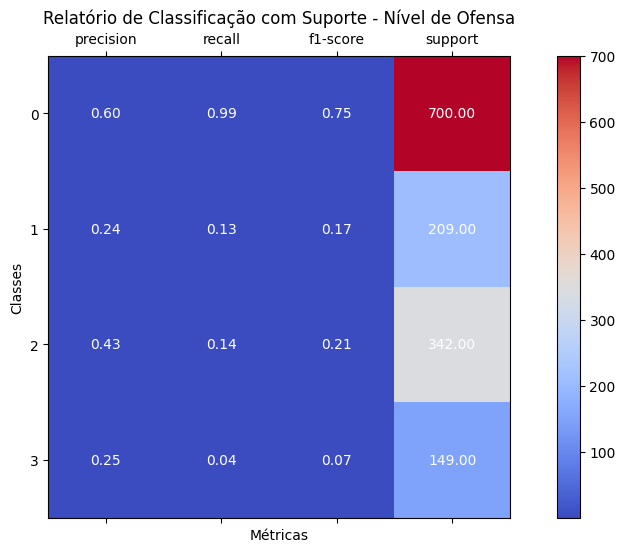

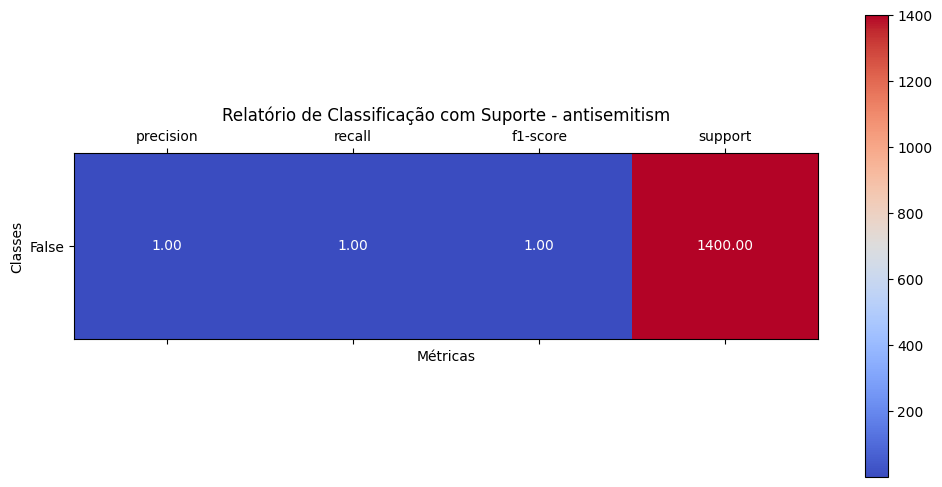

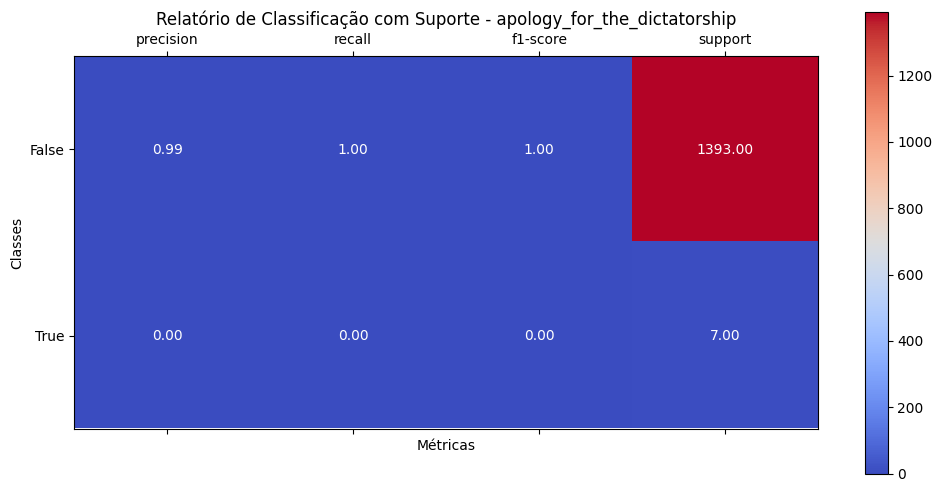

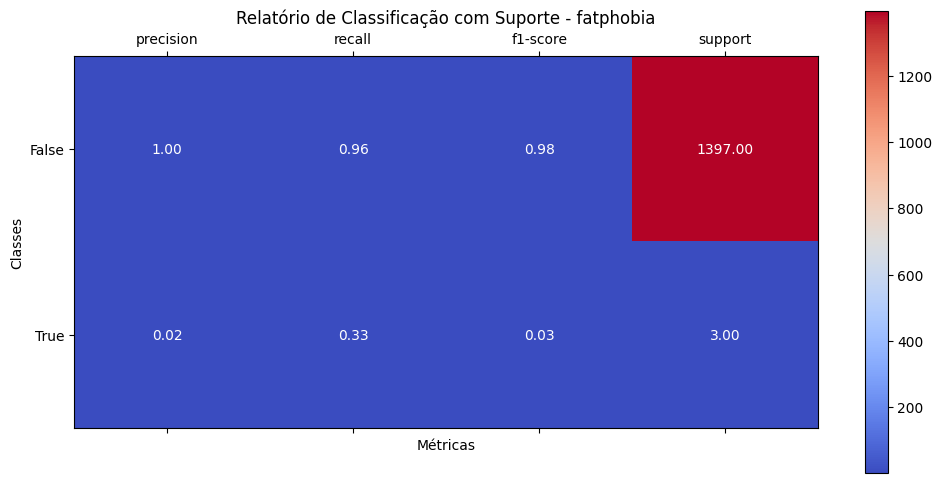

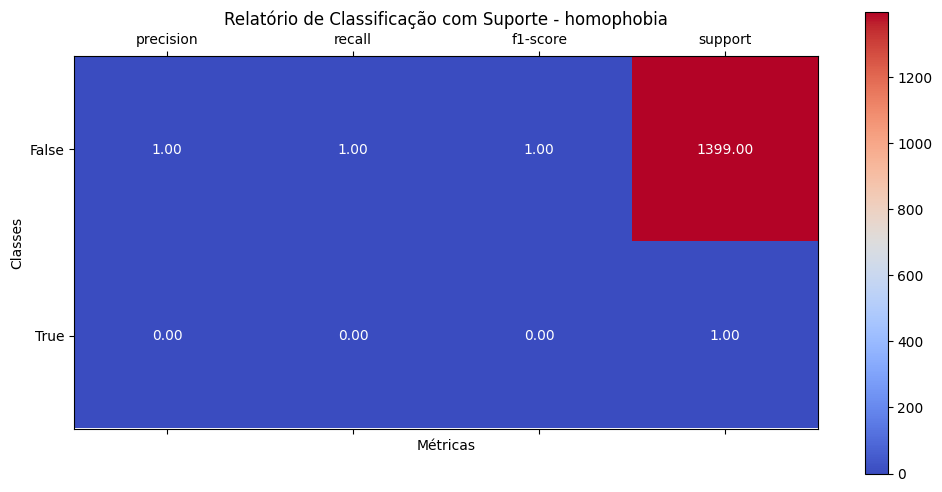

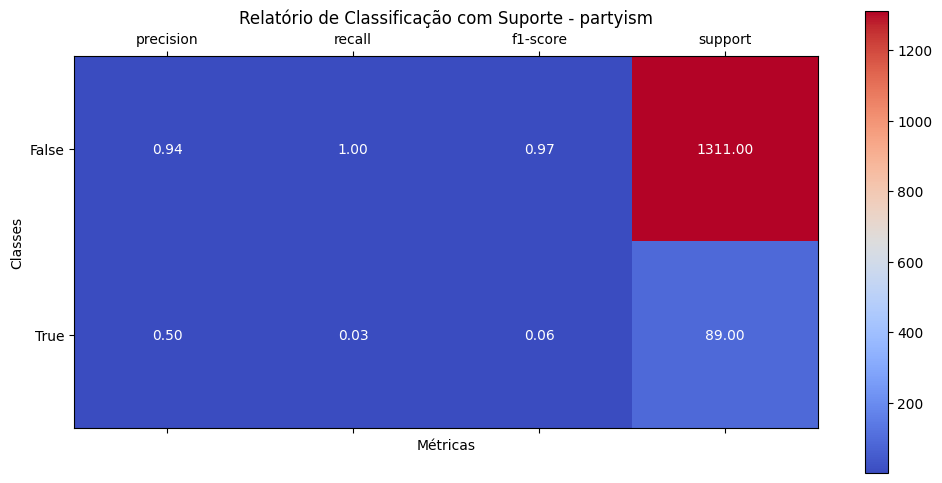

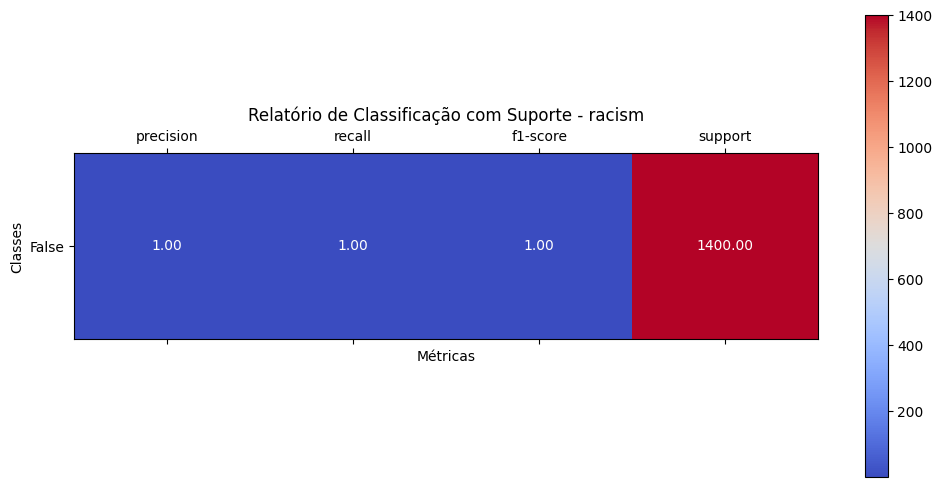

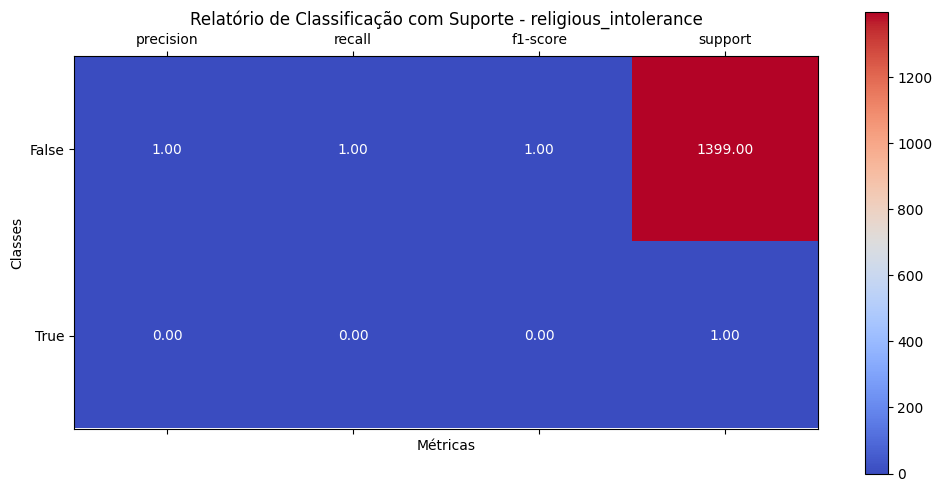

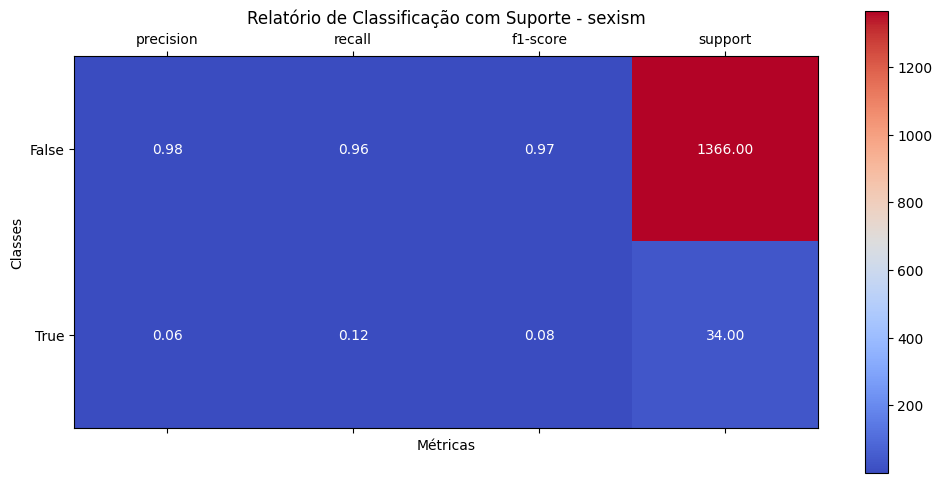

In [ ]:
# Relatório de classificação para nível de ofensa
relatorio_nivel_ofensa = classification_report(test_data['label_level'], predictions_level, output_dict=True, zero_division=0)

# Plota o relatório de classificação para nível de ofensa
plotar_relatorio_classificacao_com_suporte(relatorio_nivel_ofensa, 'Nível de Ofensa')

# Gera relatório de classificação para cada tipo de ofensa
for i, coluna in enumerate(y_types.columns):  # Loop que navega pelos tipos de ofensa
    relatorio_tipo_ofensa = classification_report(test_data[coluna], predictions_types[:, i], output_dict=True, zero_division=0)
    # Plota o relatório de classificação
    plotar_relatorio_classificacao_com_suporte(relatorio_tipo_ofensa, coluna)


#### Conclusão
A implementação do método Random Forest para a classificação de níveis e tipos de ofensa no conjunto de dados revelou resultados variados. As previsões de nível de ofensa indicaram uma acurácia de 0.55, sugerindo que o modelo apresenta limitações significativas na distinção entre os diferentes níveis de ofensa, especialmente para as classes 1, 2 e 3, que apresentaram baixa precisão e recall.

No que diz respeito à classificação dos tipos de ofensa, o modelo demonstrou uma eficácia impressionante na detecção de antisemitismo, homofobia e racismo, alcançando uma precisão e recall de 1.00 para as classes correspondentes, mas isso se deve à falta de amostras positivas em algumas dessas categorias, refletindo uma limitação na variabilidade dos dados. No entanto, para outras categorias, como 'apology_for_the_dictatorship' e 'fatphobia', o desempenho foi inconsistente, com o modelo apresentando desafios significativos na identificação de instâncias positivas.

Além disso, as métricas de desempenho, como o F1-score, revelaram uma necessidade de atenção às classes com menor suporte, sugerindo que o modelo pode não estar suficientemente treinado para reconhecer ofensas menos frequentes. O tempo de execução de 46 segundos para completar o processo de classificação foi considerado eficiente.

### Gradient Boosting
O *Gradient Boosting* é um algoritmo de aprendizado de máquina que constrói modelos preditivos de forma sequencial, adicionando novas árvores de decisão que corrigem os erros das árvores anteriores, melhorando continuamente sua performance. O *Gradient Boosting* é particularmente eficaz em problemas complexos, onde a combinação de múltiplas árvores pode capturar padrões sutis nos dados.

No código apresentado, o classificador *Gradient Boosting* foi utilizado para realizar uma tarefa de classificação multi-output, permitindo prever múltiplas saídas a partir de um único conjunto de características (os textos do dataset HateBR). Os dados foram divididos em variáveis de entrada (os vetores gerados) e variáveis de saída, que incluem o nível de ofensa e os tipos de ofensa.

O classificador foi inicializado sem parâmetros específicos, exceto a definição de um *random_state* para garantir os mesmos resultados a cada execução. Um classificador de múltiplas saídas foi criado utilizando o *MultiOutputClassifier*, que permite que o modelo aprenda a prever tanto o nível de ofensa quanto os diferentes tipos de ofensa simultaneamente.

Após o treinamento do modelo com os dados combinados, previsões foram feitas para os conjuntos de teste, resultando em previsões tanto para o nível de ofensa quanto para os tipos de ofensa. O desempenho do modelo foi avaliado através da geração de relatórios de classificação, que fornecem métricas como precisão, recall e F1-score, permitindo uma análise detalhada da eficácia do classificador em cada categoria.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier # Serve para importar o classificador Gradient Boosting
from sklearn.multioutput import MultiOutputClassifier  # Serve para permitir a classificação de múltiplas saídas
from sklearn.metrics import classification_report  # Serve para importar a função que gera relatórios de classificação

# Dividindo os dados em variáveis de entrada e saída
X = train_vectors  # Vetores de entrada
y_level = train_data['label_level']  # Nível de ofensa
y_types = train_data[['antisemitism', 'apology_for_the_dictatorship',
                       'fatphobia', 'homophobia', 'partyism',
                       'racism', 'religious_intolerance', 'sexism']]  # Tipos de ofensa

# Criando o classificador
gb = GradientBoostingClassifier(random_state=42)  # Inicializa o classificador Gradient Boosting
multi_output_gb = MultiOutputClassifier(gb)  # Cria o classificador para múltiplas saídas

# Concatenando as saídas em um único DataFrame
y_combined = pd.concat([y_level, y_types], axis=1)

# Treinando o modelo com ambos os alvos
multi_output_gb.fit(X, y_combined)

# Fazendo previsões
predictions_combined = multi_output_gb.predict(test_vectors)

# Separando as previsões de nível de ofensa e tipos de ofensa
predictions_level = predictions_combined[:, 0]  # Nível de ofensa
predictions_types = predictions_combined[:, 1:]  # Tipos de ofensa

# Avaliando os resultados
print("Previsões de nível de ofensa:")
print(predictions_level)
print("\nPrevisões de tipos de ofensa:")
print(predictions_types)

# Gerando relatórios de classificação
print("\nRelatório de Classificação para Nível de Ofensa:")
print(classification_report(test_data['label_level'], predictions_level, zero_division=0))

# Para os tipos de ofensa, gerando um relatório de classificação para cada tipo
for i, column in enumerate(y_types.columns):
    print(f"\nRelatório de Classificação para {column}:")
    print(classification_report(test_data[column], predictions_types[:, i], zero_division=0))


Previsões de nível de ofensa:
[2 0 1 ... 0 0 0]

Previsões de tipos de ofensa:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Relatório de Classificação para Nível de Ofensa:
              precision    recall  f1-score   support

           0       0.68      0.94      0.79       700
           1       0.21      0.21      0.21       209
           2       0.48      0.27      0.34       342
           3       0.35      0.09      0.15       149

    accuracy                           0.58      1400
   macro avg       0.43      0.38      0.37      1400
weighted avg       0.53      0.58      0.53      1400


Relatório de Classificação para antisemitism:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1400
           1       0.00      0.00      0.00         0

    accuracy                           1.00      1400
   macro avg       0.50      0.50      0.50      14

Plotando os relatórios

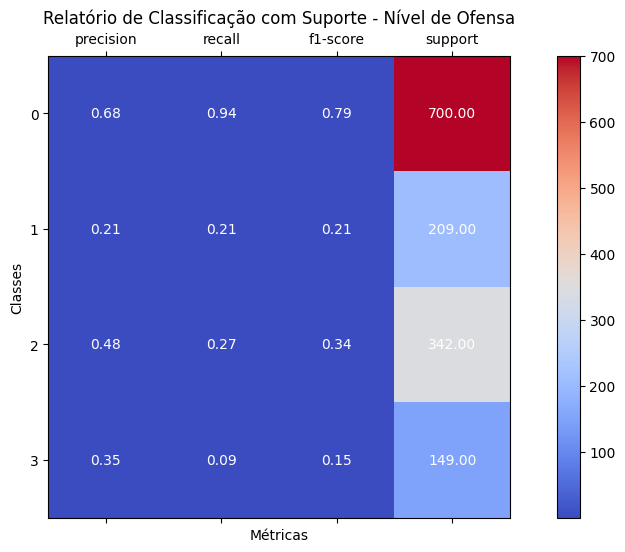

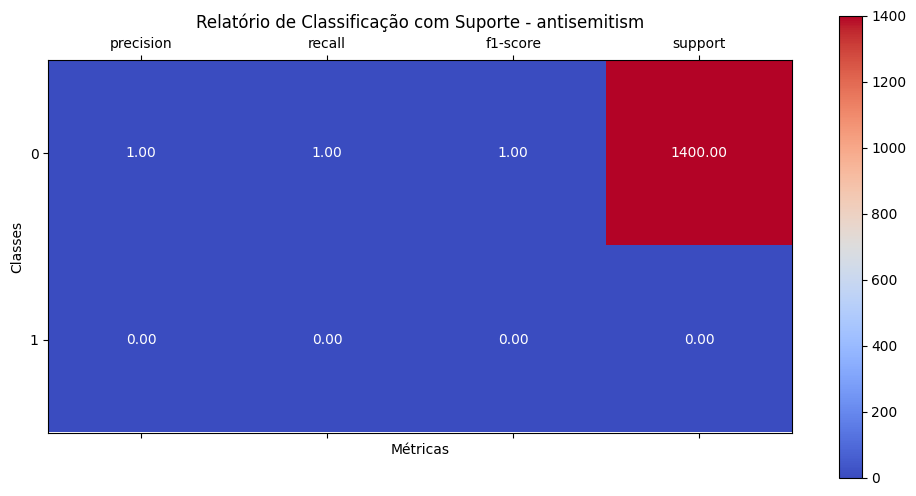

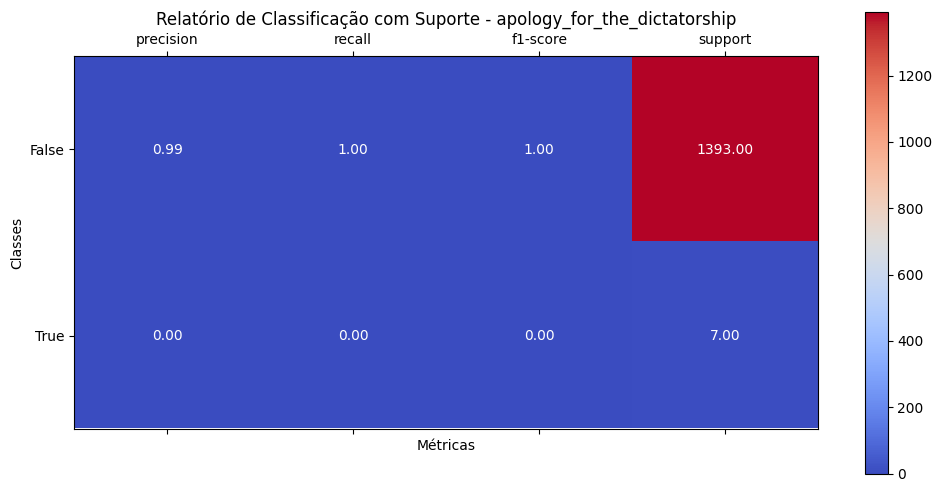

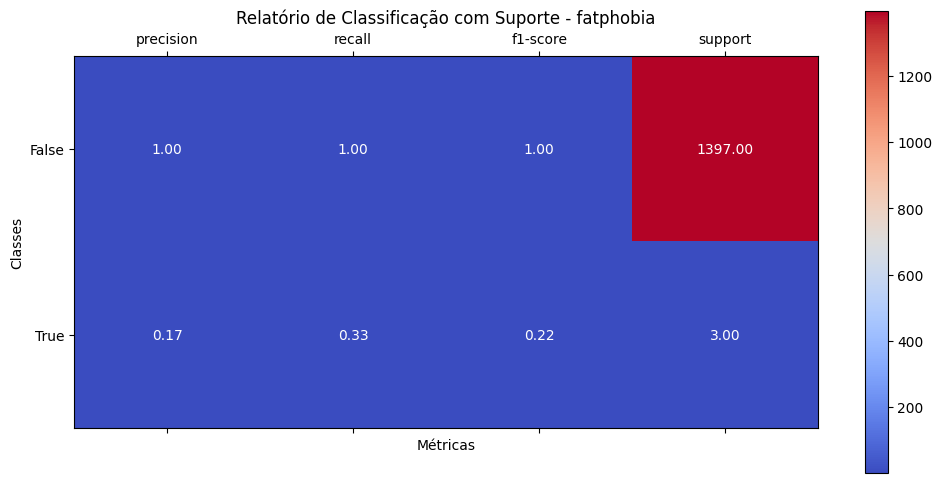

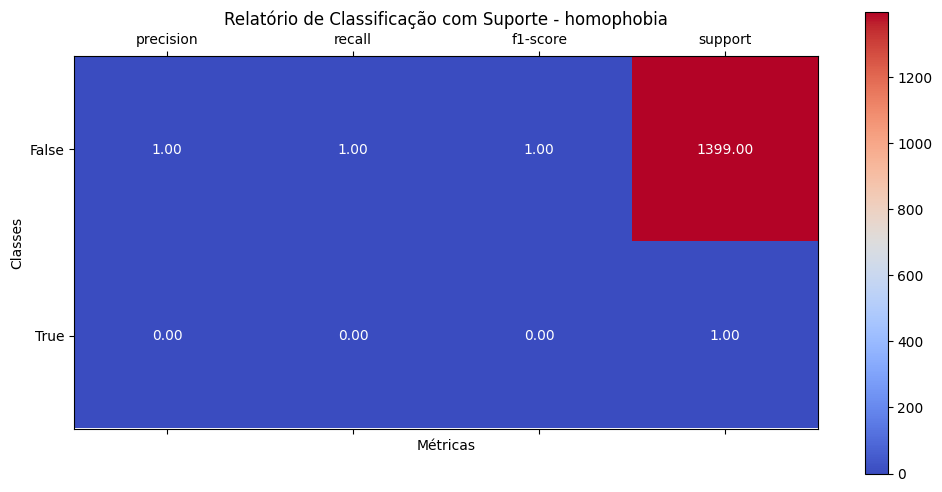

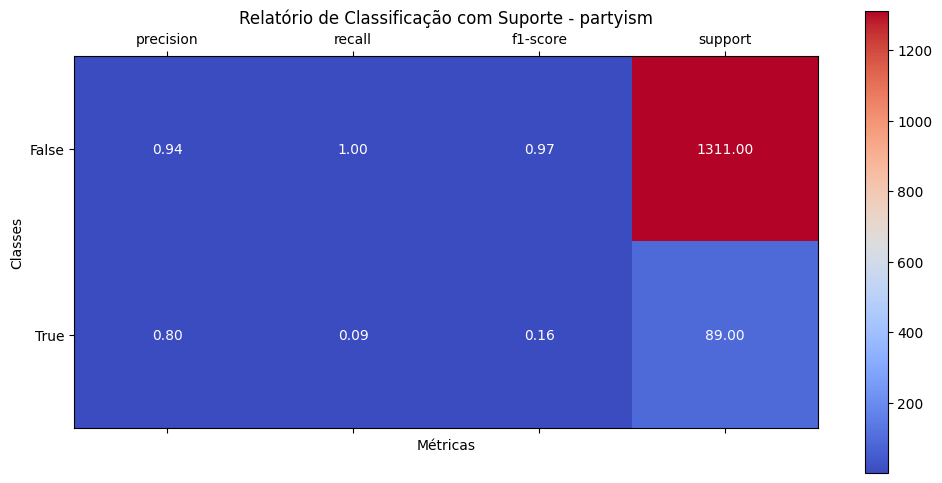

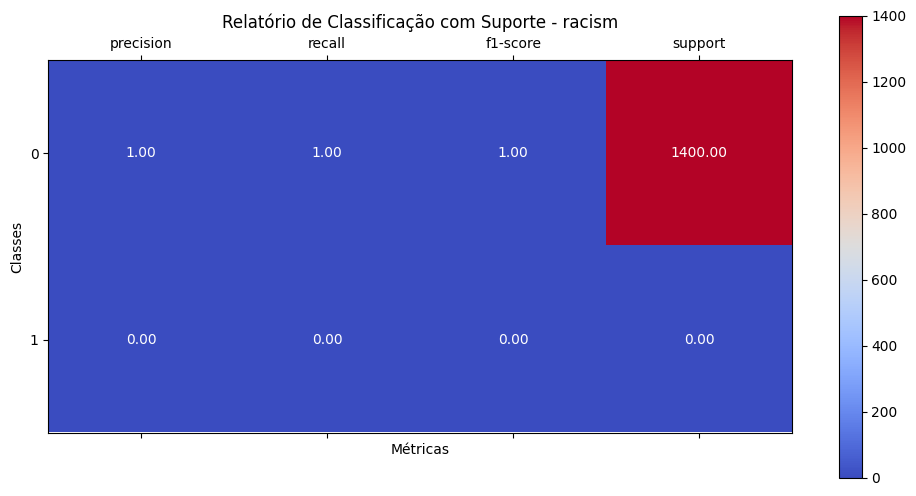

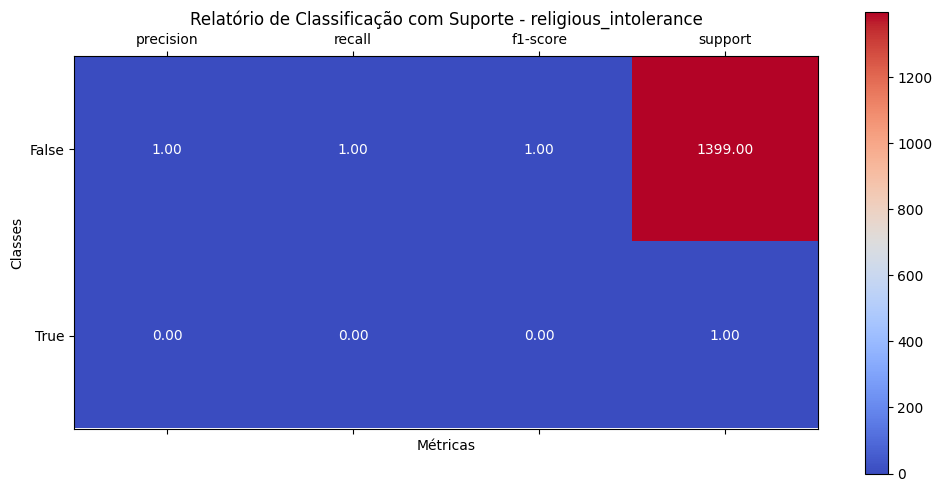

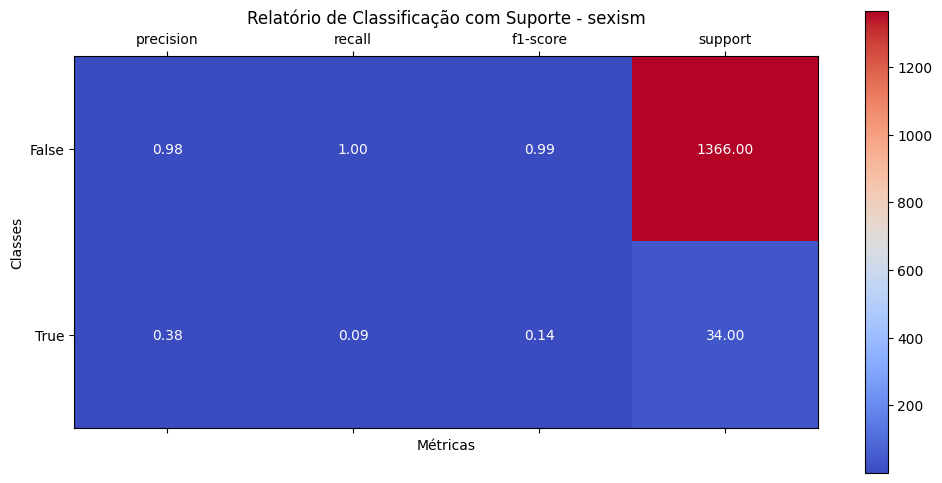

In [ ]:
# Relatório de classificação para nível de ofensa
relatorio_nivel_ofensa = classification_report(test_data['label_level'], predictions_level, output_dict=True, zero_division=0)

# Plota o relatório de classificação para nível de ofensa
plotar_relatorio_classificacao_com_suporte(relatorio_nivel_ofensa, 'Nível de Ofensa')

# Gera relatório de classificação para cada tipo de ofensa
for i, coluna in enumerate(y_types.columns):  # Loop que navega pelos tipos de ofensa
    relatorio_tipo_ofensa = classification_report(test_data[coluna], predictions_types[:, i], output_dict=True, zero_division=0)
    # Plota o relatório de classificação
    plotar_relatorio_classificacao_com_suporte(relatorio_tipo_ofensa, coluna)


#### Conclusão
A implementação do método Gradient Boosting para a classificação de níveis e tipos de ofensa no conjunto de dados apresentou resultados variados, com uma acurácia de 0.58 para a previsão de nível de ofensa. O desempenho do modelo foi mais eficaz na detecção da classe 0, com uma precisão de 0.68 e recall de 0.94, mas enfrentou dificuldades significativas nas classes 1, 2 e 3, que mostraram baixos valores de precisão e recall.

Para os tipos de ofensa, o modelo conseguiu uma precisão de 1.00 na detecção de antisemitismo, homofobia e racismo, mas isso se deve à falta de amostras positivas em algumas dessas categorias, refletindo uma limitação na variabilidade dos dados. Contudo, em outras classes, como 'apology_for_the_dictatorship' e 'fatphobia', o desempenho foi inconsistente, especialmente para as instâncias verdadeiras, que apresentaram baixa taxa de detecção.

As métricas de desempenho, como o F1-score, mostraram que algumas classes, como 'partyism' e 'sexism', também precisam de atenção, uma vez que apresentaram resultados mistos, com uma precisão e recall reduzidos para as instâncias positivas. O tempo de execução do modelo foi de 4 minutos, o que é aceitável, considerando a complexidade do algoritmo.

### Xgboost
O *XGBoost* (eXtreme Gradient Boosting) é um algoritmo de aprendizado de máquina baseado em árvores de decisão que se destaca pela sua eficiência em tarefas de classificação e regressão. Este método é conhecido por sua capacidade de lidar com grandes volumes de dados e por otimizações que melhoram o desempenho e reduzem o tempo de treinamento.

No código abaixo, o classificador *XGBoost* foi implementado para realizar uma tarefa de classificação multi-output (múltiplas saídas). Os dados foram divididos em variáveis de entrada (os vetores gerados dos textos do dataset HateBR) e variáveis de saída, que incluem tanto o nível de ofensa quanto os diferentes tipos de ofensa presentes nos dados.

O classificador foi criado com o parâmetro `eval_metric` configurado para 'logloss', que é uma métrica de avaliação comum para modelos de classificação binária e multiclasse, medindo o desempenho de um modelo quantificando a diferença entre as probabilidades previstas e os valores reais. O parâmetro `random_state` foi definido para garantir os mesmos resultados a cada execução.

O modelo foi treinado utilizando o conjunto de dados que inclui todas as saídas desejadas, permitindo que ele aprendesse as relações entre as variáveis de entrada e as diferentes saídas.

Após o treinamento, foram feitas previsões tanto para o nível de ofensa quanto para os tipos de ofensa. O desempenho do modelo foi avaliado utilizando relatórios de classificação, que fornecem métricas importantes como precisão, recall e F1-score, possibilitando uma análise detalhada da eficácia do classificador em cada uma das categorias de saída.

In [ ]:
from xgboost import XGBClassifier # Serve para importar o classificador Xgboost
from sklearn.multioutput import MultiOutputClassifier  # Serve para permitir a classificação de múltiplas saídas
from sklearn.metrics import classification_report  # Serve para importar a função que gera relatórios de classificação

# Dividindo os dados em variáveis de entrada e saída
X = train_vectors  # Vetores de entrada
y_level = train_data['label_level']  # Nível de ofensa
y_types = train_data[['antisemitism', 'apology_for_the_dictatorship',
                      'fatphobia', 'homophobia', 'partyism',
                      'racism', 'religious_intolerance', 'sexism']]  # Tipos de ofensa

# Criando o classificador com XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
multi_output_xgb = MultiOutputClassifier(xgb)

# Concatenando as saídas em um único DataFrame
y_combined = pd.concat([y_level, y_types], axis=1)

# Treinando o modelo com ambos os alvos
multi_output_xgb.fit(X, y_combined)

# Fazendo previsões
predictions_combined = multi_output_xgb.predict(test_vectors)

# Separando as previsões de nível de ofensa e tipos de ofensa
predictions_level = predictions_combined[:, 0]  # Nível de ofensa
predictions_types = predictions_combined[:, 1:]  # Tipos de ofensa

# Avaliando os resultados
print("Previsões de nível de ofensa:")
print(predictions_level)
print("\nPrevisões de tipos de ofensa:")
print(predictions_types)

# Relatório de classificação para o Nível de Ofensa
print("\nRelatório de Classificação para Nível de Ofensa:")
print(classification_report(test_data['label_level'], predictions_level, zero_division=0))

# Para os tipos de ofensa, você pode gerar um relatório de classificação para cada tipo
for i, column in enumerate(y_types.columns):
    print(f"\nRelatório de Classificação para {column}:")
    print(classification_report(test_data[column], predictions_types[:, i], zero_division=0))


Previsões de nível de ofensa:
[2 0 1 ... 0 0 0]

Previsões de tipos de ofensa:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Relatório de Classificação para Nível de Ofensa:
              precision    recall  f1-score   support

           0       0.71      0.95      0.81       700
           1       0.23      0.22      0.23       209
           2       0.45      0.28      0.35       342
           3       0.28      0.09      0.14       149

    accuracy                           0.59      1400
   macro avg       0.42      0.39      0.38      1400
weighted avg       0.53      0.59      0.54      1400


Relatório de Classificação para antisemitism:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1400

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      14

Plotando os relatórios

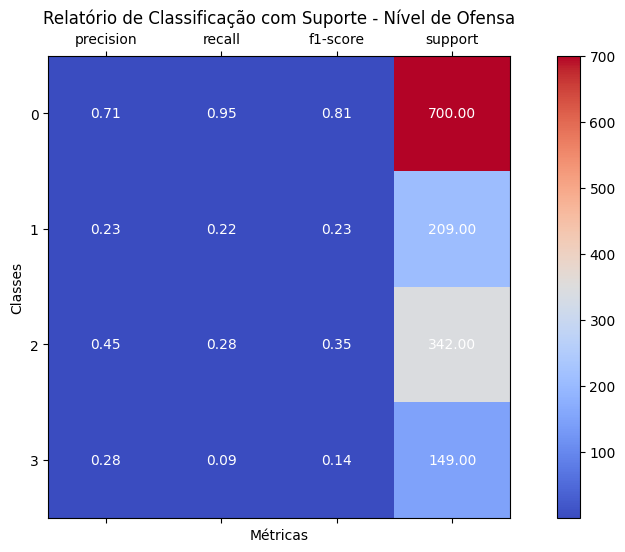

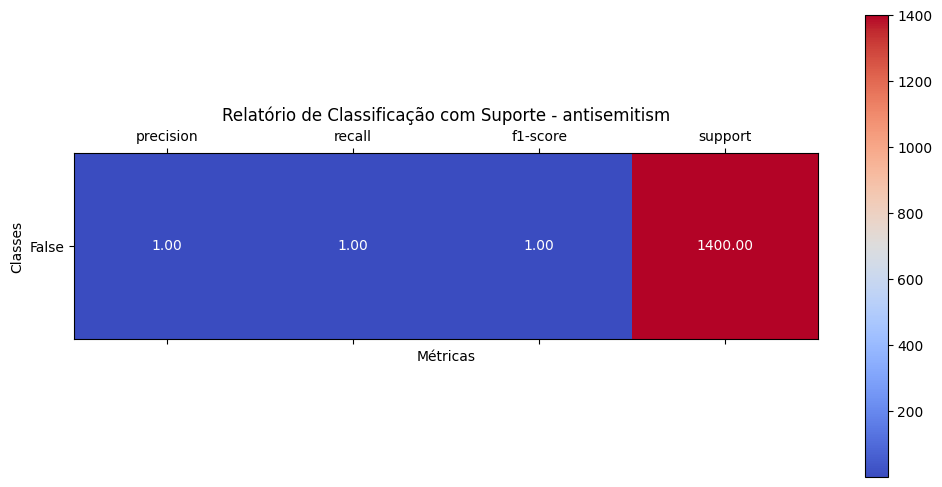

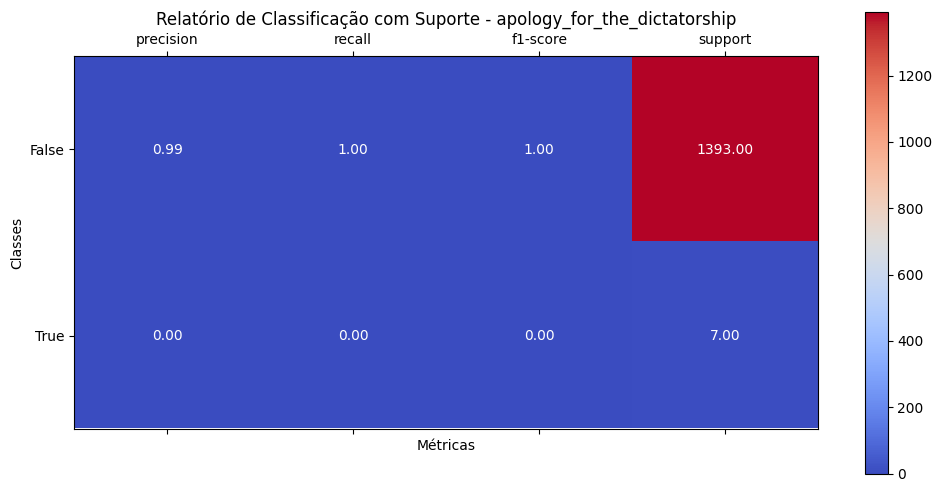

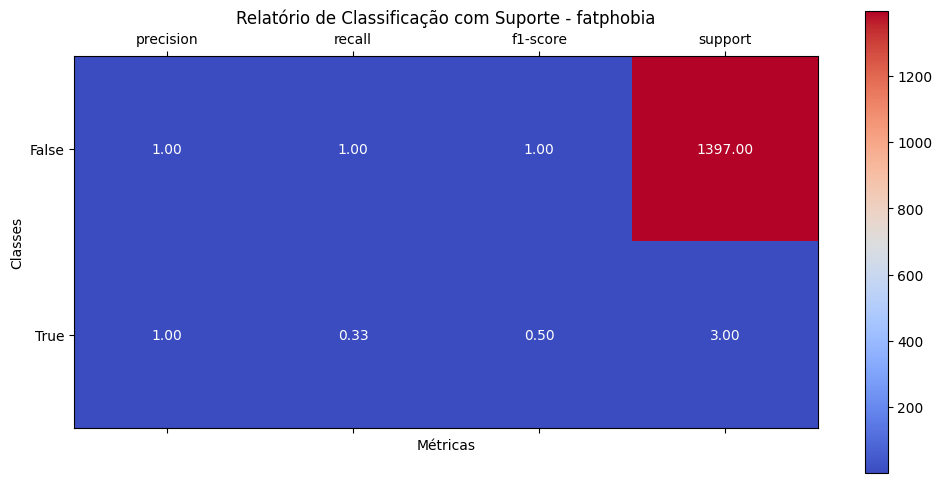

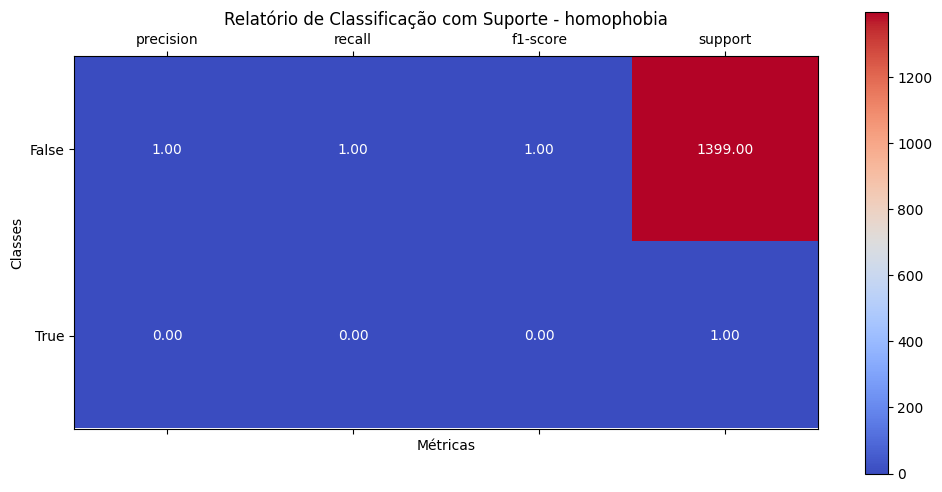

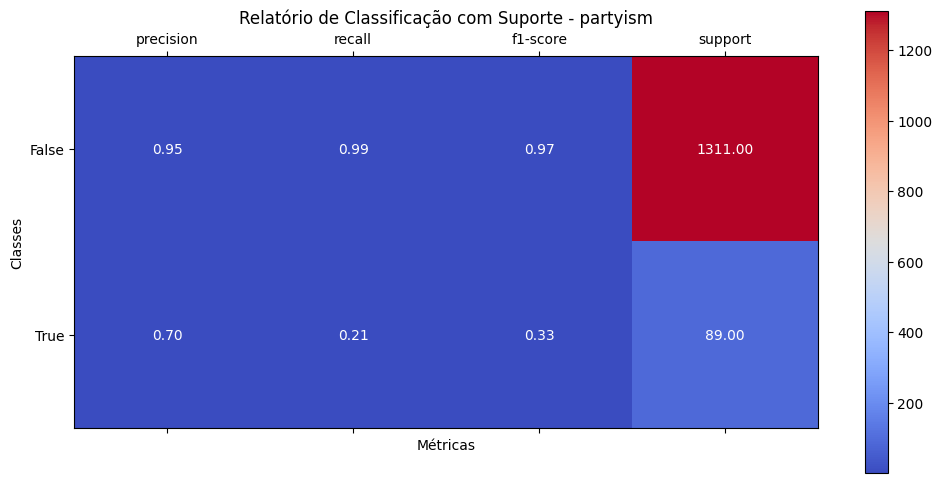

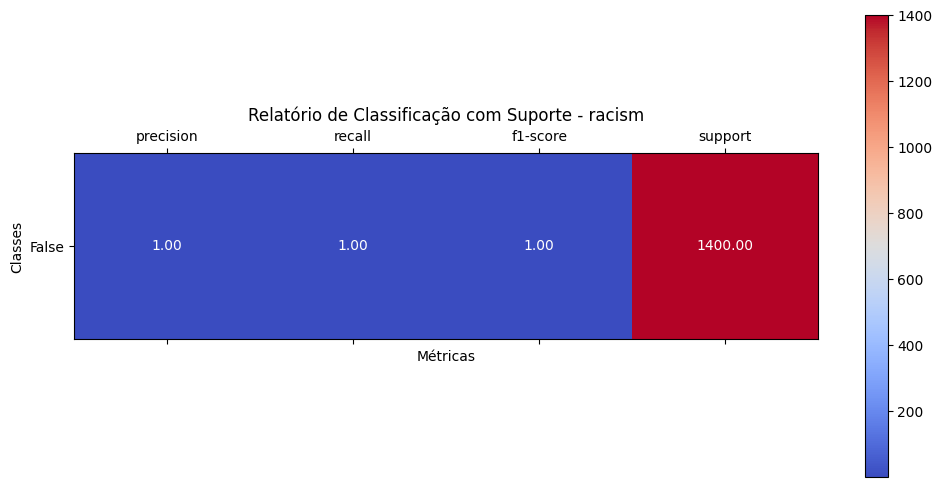

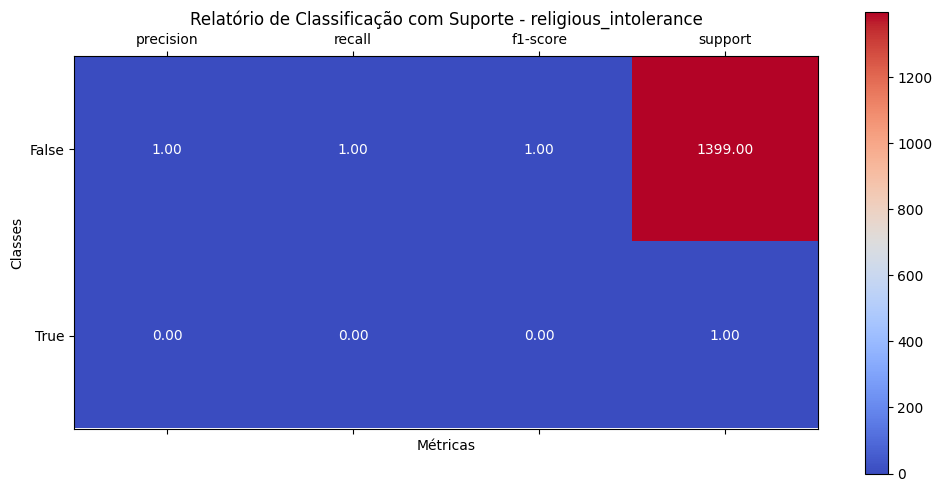

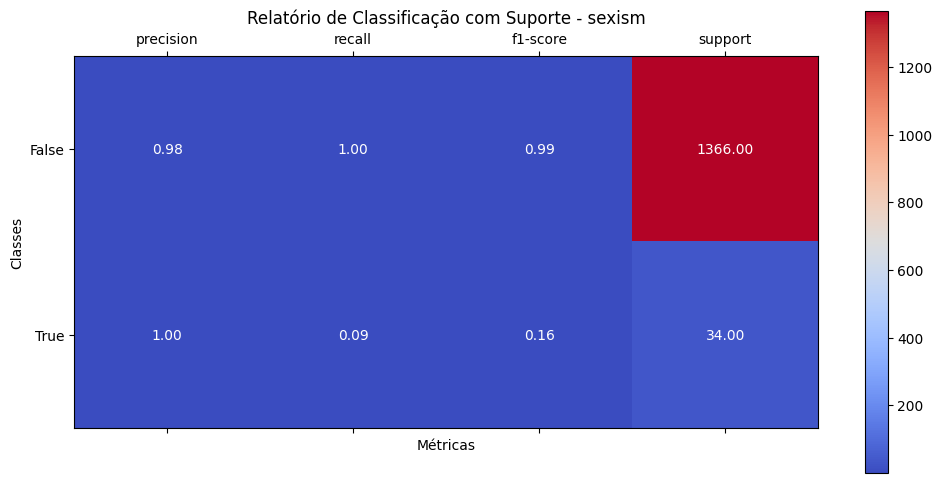

In [ ]:
# Relatório de classificação para nível de ofensa
relatorio_nivel_ofensa = classification_report(test_data['label_level'], predictions_level, output_dict=True, zero_division=0)

# Plota o relatório de classificação para nível de ofensa
plotar_relatorio_classificacao_com_suporte(relatorio_nivel_ofensa, 'Nível de Ofensa')

# Gera relatório de classificação para cada tipo de ofensa
for i, coluna in enumerate(y_types.columns):  # Loop que navega pelos tipos de ofensa
    relatorio_tipo_ofensa = classification_report(test_data[coluna], predictions_types[:, i], output_dict=True, zero_division=0)
    # Plota o relatório de classificação
    plotar_relatorio_classificacao_com_suporte(relatorio_tipo_ofensa, coluna)


#### Conclusão
A aplicação do XGBoost para a classificação de níveis e tipos de ofensa no conjunto de dados resultou em um desempenho geral com uma acurácia de 0.59 para a previsão de nível de ofensa. O modelo destacou-se na classe 0, obtendo uma precisão de 0.71 e um recall de 0.95, indicando uma boa capacidade de identificação dessa categoria. No entanto, as classes 1, 2 e 3 apresentaram resultados mais modestos, com precisão e recall abaixo do ideal.

Em relação aos tipos de ofensa, o modelo mostrou uma precisão perfeita de 1.00 para a classe de antisemitismo e racismo, mas isso se deve à falta de amostras positivas em algumas dessas categorias, refletindo uma limitação na variabilidade dos dados. No entanto, em outras classes, como 'apology_for_the_dictatorship', 'homophobia' e 'fatphobia', o modelo enfrentou desafios, especialmente na detecção de instâncias verdadeiras, que foram significativamente baixas.

Além disso, a classe 'partyism' revelou um desempenho misto, com uma precisão de 0.95 e recall de 0.21, sugerindo que, embora o modelo tenha identificado corretamente a maioria das instâncias falsas, teve dificuldade na detecção de ofensas verdadeiras.

O tempo de execução do modelo foi de 19 segundos, demonstrando a eficiência na realização das previsões.

### LightGBM
O *LightGBM* (Light Gradient Boosting Machine) é um algoritmo de aprendizado de máquina que utiliza o método Gradient Boosting, projetado para ser altamente eficiente e rápido, utilizando técnicas de otimização como Gradient-Based One-Side Sampling (GOSS) e Exclusive Feature Bundling (EFB). Esse algoritmo é particularmente eficaz em grandes conjuntos de dados e oferece suporte a tarefas de classificação (binária e multiclasse) e regressão.

No código abaixo, o classificador *LightGBM* foi implementado para realizar uma tarefa de classificação multi-output (múltiplas saídas). Os dados foram divididos em variáveis de entrada (os vetores gerados dos textos do dataset HateBR) e variáveis de saída, que incluem tanto o nível de ofensa quanto os diferentes tipos de ofensa presentes nos dados.

O classificador foi criado com o parâmetro `random_state` definido para garantir os mesmos resultados a cada execução.

O modelo foi treinado utilizando o conjunto de dados que inclui todas as saídas desejadas, permitindo que ele aprendesse as relações entre as variáveis de entrada e as diferentes saídas.

Após o treinamento, foram feitas previsões tanto para o nível de ofensa quanto para os tipos de ofensa. O desempenho do modelo foi avaliado utilizando relatórios de classificação, que fornecem métricas importantes como precisão, recall e F1-score, possibilitando uma análise detalhada da eficácia do classificador em cada uma das categorias de saída.

In [ ]:
!pip install lightgbm # Instalando o LightGBM

In [ ]:
import lightgbm as lgb # Serve para importar o classificador LightGBM
from sklearn.multioutput import MultiOutputClassifier  # Serve para permitir a classificação de múltiplas saídas
from sklearn.metrics import classification_report  # Serve para importar a função que gera relatórios de classificação

# Dividindo os dados em variáveis de entrada e saída
X = train_vectors  # Vetores de entrada
y_level = train_data['label_level']  # Nível de ofensa
y_types = train_data[['antisemitism', 'apology_for_the_dictatorship',
                      'fatphobia', 'homophobia', 'partyism',
                      'racism', 'religious_intolerance', 'sexism']]  # Tipos de ofensa

# Criando o classificador com LightGBM
lgb_classifier = lgb.LGBMClassifier(random_state=42, verbose=-1) # Verbose = -1 -> Desativa o Log de saida (para nao ficar printando enquanto o codigo estiver rodando)
multi_output_lgb = MultiOutputClassifier(lgb_classifier)

# Concatenando as saídas em um único DataFrame
y_combined = pd.concat([y_level, y_types], axis=1)

# Treinando o modelo com ambos os alvos
multi_output_lgb.fit(X, y_combined)

# Fazendo previsões
predictions_combined = multi_output_lgb.predict(test_vectors)

# Separando as previsões de nível de ofensa e tipos de ofensa
predictions_level = predictions_combined[:, 0]  # Nível de ofensa
predictions_types = predictions_combined[:, 1:]  # Tipos de ofensa

# Avaliando os resultados
print("Previsões de nível de ofensa:")
print(predictions_level)
print("\nPrevisões de tipos de ofensa:")
print(predictions_types)

# Relatório de classificação para o Nível de Ofensa
print("\nRelatório de Classificação para Nível de Ofensa:")
print(classification_report(test_data['label_level'], predictions_level, zero_division=0))

# Para os tipos de ofensa, você pode gerar um relatório de classificação para cada tipo
for i, column in enumerate(y_types.columns):
    print(f"\nRelatório de Classificação para {column}:")
    print(classification_report(test_data[column], predictions_types[:, i], zero_division=0))


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




Previsões de nível de ofensa:
[2 0 1 ... 0 0 0]

Previsões de tipos de ofensa:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Relatório de Classificação para Nível de Ofensa:
              precision    recall  f1-score   support

           0       0.70      0.93      0.80       700
           1       0.21      0.22      0.21       209
           2       0.44      0.27      0.34       342
           3       0.24      0.07      0.11       149

    accuracy                           0.57      1400
   macro avg       0.40      0.37      0.37      1400
weighted avg       0.52      0.57      0.53      1400


Relatório de Classificação para antisemitism:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1400

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      14

Plotando os relatórios

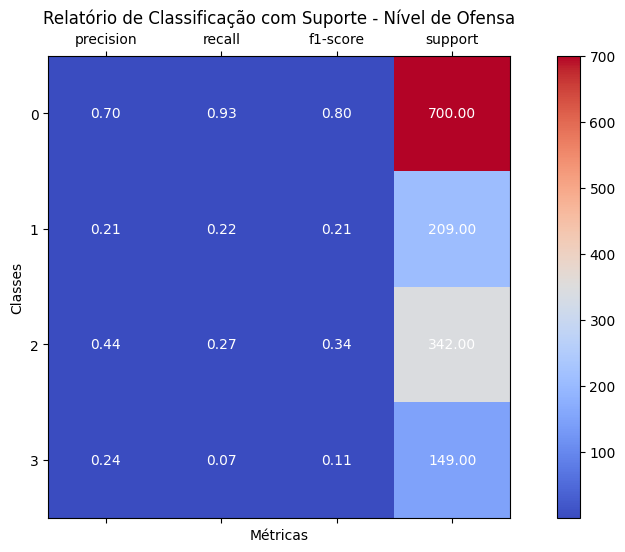

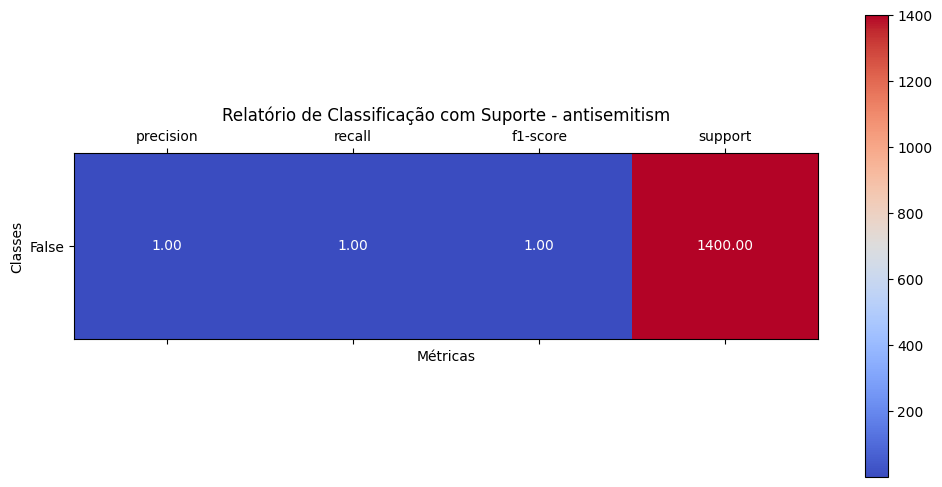

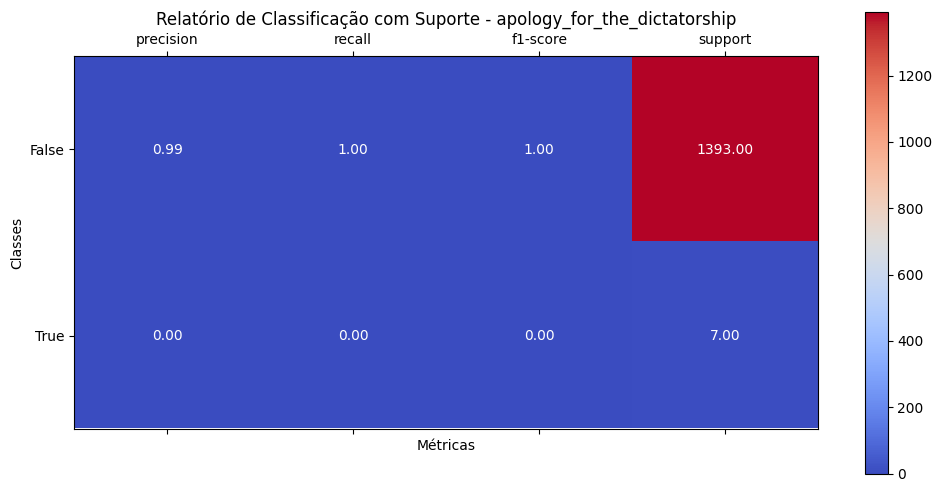

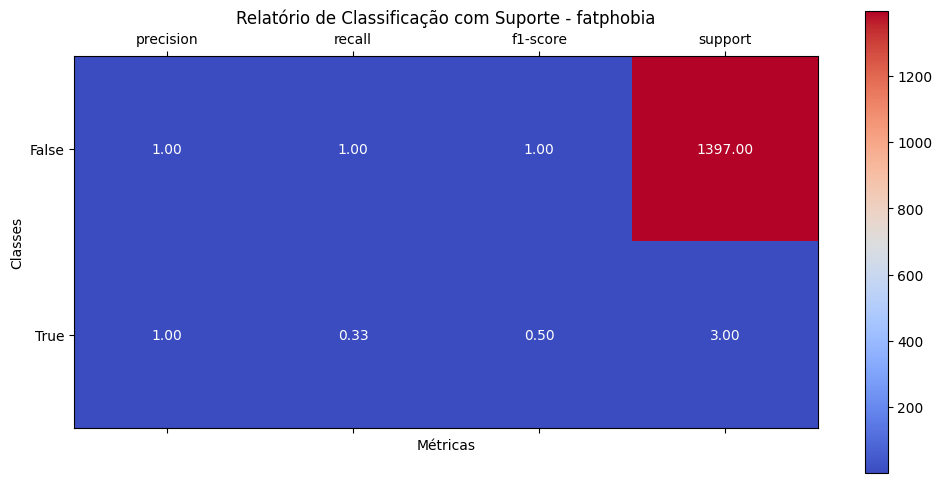

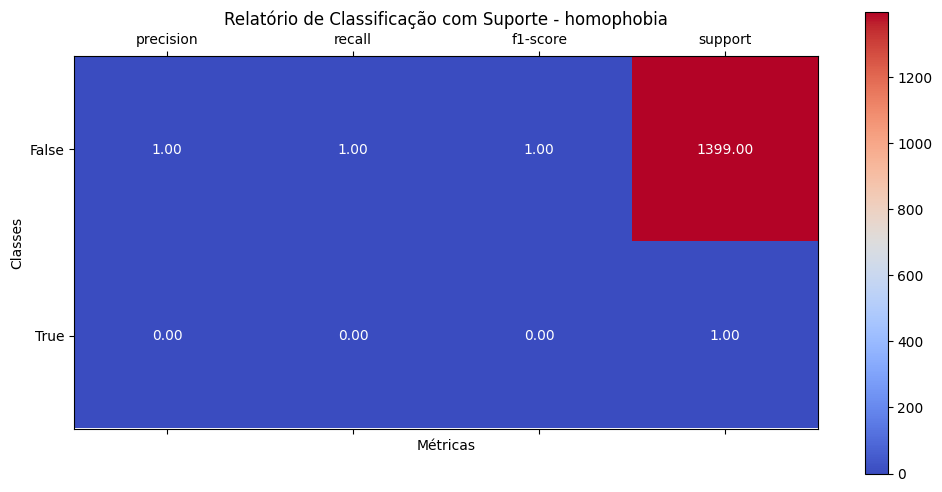

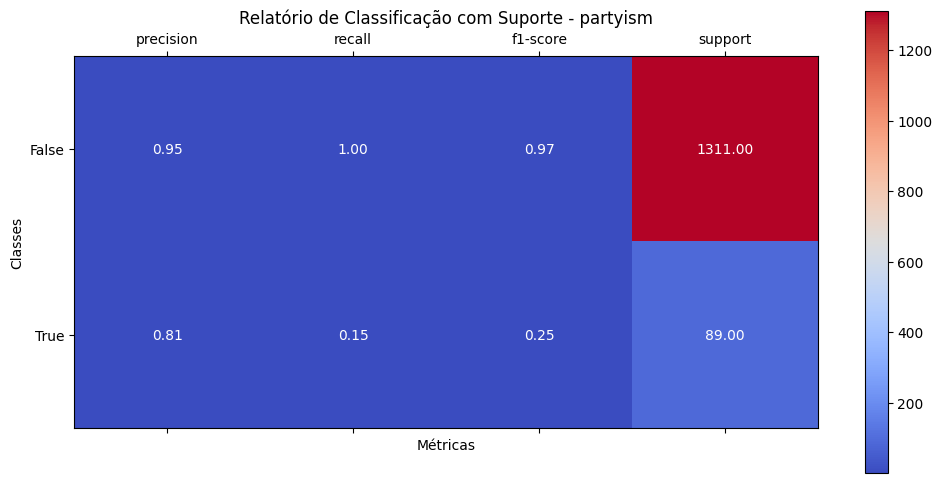

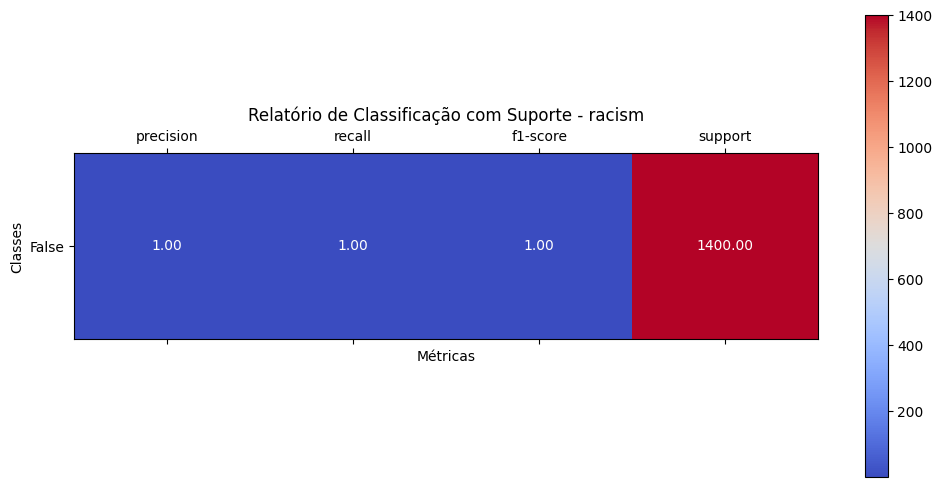

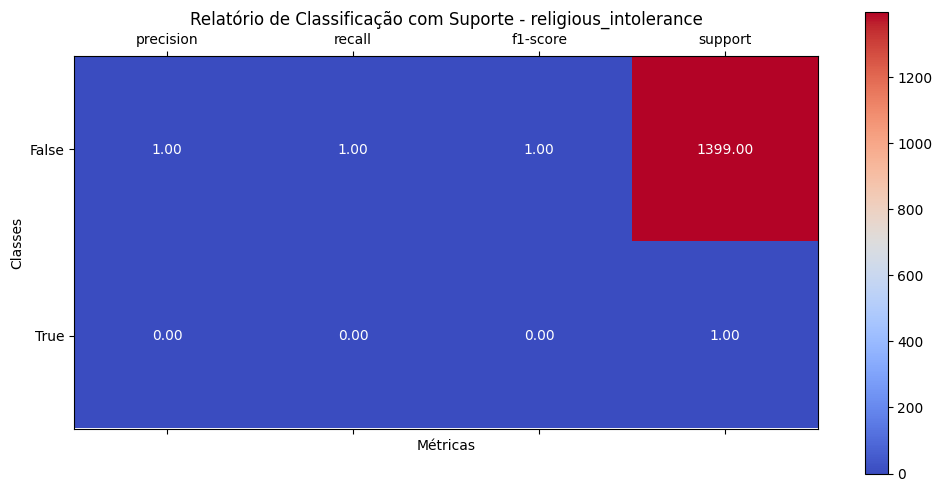

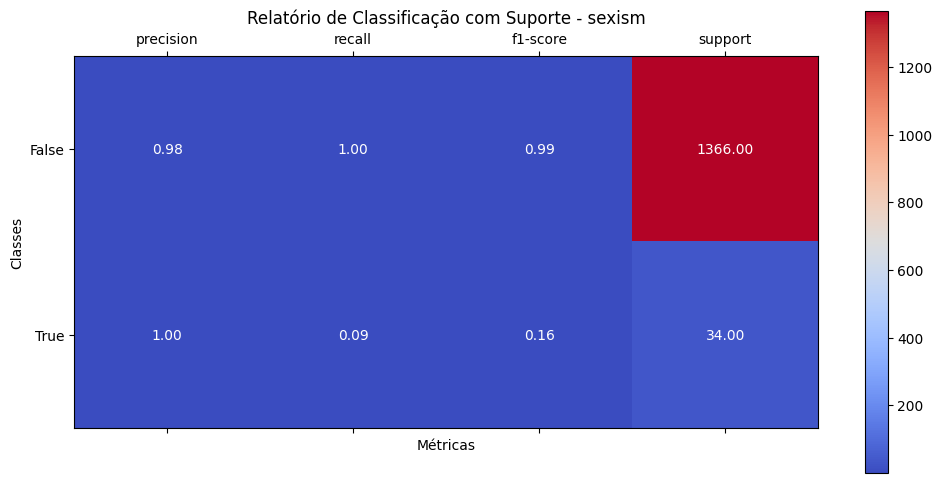

In [ ]:
# Relatório de classificação para nível de ofensa
relatorio_nivel_ofensa = classification_report(test_data['label_level'], predictions_level, output_dict=True, zero_division=0)

# Plota o relatório de classificação para nível de ofensa
plotar_relatorio_classificacao_com_suporte(relatorio_nivel_ofensa, 'Nível de Ofensa')

# Gera relatório de classificação para cada tipo de ofensa
for i, coluna in enumerate(y_types.columns):  # Loop que navega pelos tipos de ofensa
    relatorio_tipo_ofensa = classification_report(test_data[coluna], predictions_types[:, i], output_dict=True, zero_division=0)
    # Plota o relatório de classificação
    plotar_relatorio_classificacao_com_suporte(relatorio_tipo_ofensa, coluna)


#### Conclusão
A aplicação do LightGBM para a classificação de níveis e tipos de ofensa no conjunto de dados resultou em um desempenho geral com uma acurácia de 0.57 para a previsão de nível de ofensa. O modelo apresentou um desempenho consistente na classe 0, com uma precisão de 0.70 e um recall de 0.93, demonstrando uma boa capacidade de identificar comentários que não contêm ofensas. No entanto, as classes 1, 2 e 3 obtiveram resultados mais desafiadores, com precisão e recall que indicam uma dificuldade em detectar ofensas mais sutis.

Nos relatórios de classificação para tipos de ofensa, o modelo destacou-se na classe de antisemitismo e racismo, mas isso se deve à falta de amostras positivas em algumas dessas categorias, refletindo uma limitação na variabilidade dos dados. Por outro lado, as classes 'apology_for_the_dictatorship', 'homophobia' e 'fatphobia' apresentaram desafios significativos, com a classe 'apology_for_the_dictatorship' mostrando uma precisão, recall e F1-score de 0.00 para a detecção de verdadeiras ofensas, sugerindo que o modelo não conseguiu identificar corretamente as instâncias dessa classe.

A classe 'partyism' teve um desempenho misto, com uma precisão de 0.81 e um recall de 0.15, evidenciando a dificuldade do modelo em reconhecer ofensas verdadeiras nesta categoria.

O tempo total de execução foi de 19 segundos, tendo uma eficiência aceitável na realização das previsões.

### CatBoost
O *CatBoost* é um algoritmo de aprendizado de máquina que utiliza o método de Gradient Boosting e é projetado para lidar com variáveis categóricas de maneira eficiente, o que o torna particularmente útil para tarefas com dados mistos. Uma característica do CatBoost é que ele cria árvores simétricas, o que significa que as divisões das árvores são feitas de forma balanceada. Isso é benéfico, pois melhora a generalização do modelo e reduz o risco de overfitting (o modelo se ajustar muito bem aos dados de treino, mas falhar ao lidar com novos dados).

No código abaixo, o classificador *CatBoost* foi implementado para realizar uma tarefa de classificação multi-output (múltiplas saídas), que é capaz de prever tanto o nível de ofensa quanto os diferentes tipos de ofensa presentes nos dados. Os dados foram divididos em variáveis de entrada (os vetores gerados dos textos do dataset HateBR) e variáveis de saída, que incluem tanto o nível de ofensa quanto os tipos específicos de ofensa.

O classificador foi inicializado com a função de perda definida como 'MultiClass', permitindo que o modelo aprenda a partir de múltiplas classes. O modelo foi treinado utilizando o conjunto de dados que inclui todas as saídas desejadas, permitindo que ele aprendesse as relações entre as variáveis de entrada e as diferentes saídas.

Após o treinamento, foram feitas previsões para o nível de ofensa e os tipos de ofensa. As previsões foram separadas em dois conjuntos: um para o nível de ofensa e outro para os tipos de ofensa. O desempenho do modelo foi avaliado utilizando relatórios de classificação, que fornecem métricas importantes como precisão, recall e F1-score, permitindo uma análise detalhada da eficácia do classificador em cada uma das categorias de saída.

In [ ]:
!pip install catboost # Instalando o CatBoost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.9 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier # Serve para importar o classificador CarBoost
from sklearn.multioutput import MultiOutputClassifier  # Serve para permitir a classificação de múltiplas saídas
from sklearn.metrics import classification_report  # Serve para importar a função que gera relatórios de classificação

# Dividindo os dados em variáveis de entrada e saída
X = train_vectors  # Vetores de entrada
y_level = train_data['label_level']  # Nível de ofensa
y_types = train_data[['antisemitism', 'apology_for_the_dictatorship',
                      'fatphobia', 'homophobia', 'partyism',
                      'racism', 'religious_intolerance', 'sexism']]  # Tipos de ofensa

# Criando o classificador com CatBoost
catboost_model = CatBoostClassifier(loss_function='MultiClass', random_state=42, verbose=False) # Verbose = False -> Desativa o Log de saida (para nao ficar printando enquanto o codigo estiver rodando)
multi_output_catboost = MultiOutputClassifier(catboost_model)

# Concatenando as saídas em um único DataFrame
y_combined = pd.concat([y_level, y_types], axis=1)

# Treinando o modelo com ambos os alvos
multi_output_catboost.fit(X, y_combined)

# Fazendo previsões
# A saída original pode ter uma forma inadequada; o reshape garante que as previsões sejam separadas corretamente
# em colunas, uma para cada alvo previsto (nível de ofensa e tipos de ofensa).
predictions_combined = multi_output_catboost.predict(test_vectors).reshape(-1, len(y_combined.columns))


# Separando as previsões de nível de ofensa e tipos de ofensa
predictions_level = predictions_combined[:, 0]  # Nível de ofensa
predictions_types = predictions_combined[:, 1:]  # Tipos de ofensa

# Avaliando os resultados
print("Previsões de nível de ofensa:")
print(predictions_level)
print("\nPrevisões de tipos de ofensa:")
print(predictions_types)

# Relatório de classificação para o Nível de Ofensa
print("\nRelatório de Classificação para Nível de Ofensa:")
print(classification_report(test_data['label_level'], predictions_level, zero_division=0))

# Para os tipos de ofensa, você pode gerar um relatório de classificação para cada tipo
for i, column in enumerate(y_types.columns):
  print(f"\nRelatório de Classificação para {column}:")
  print(classification_report(test_data[column], predictions_types[:, i], zero_division=0))


Previsões de nível de ofensa:
[1 0 1 ... 0 0 0]

Previsões de tipos de ofensa:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Relatório de Classificação para Nível de Ofensa:
              precision    recall  f1-score   support

           0       0.71      0.94      0.81       700
           1       0.25      0.26      0.25       209
           2       0.47      0.29      0.36       342
           3       0.37      0.12      0.18       149

    accuracy                           0.59      1400
   macro avg       0.45      0.40      0.40      1400
weighted avg       0.55      0.59      0.55      1400


Relatório de Classificação para antisemitism:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1400

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      14

Plotando os relatórios

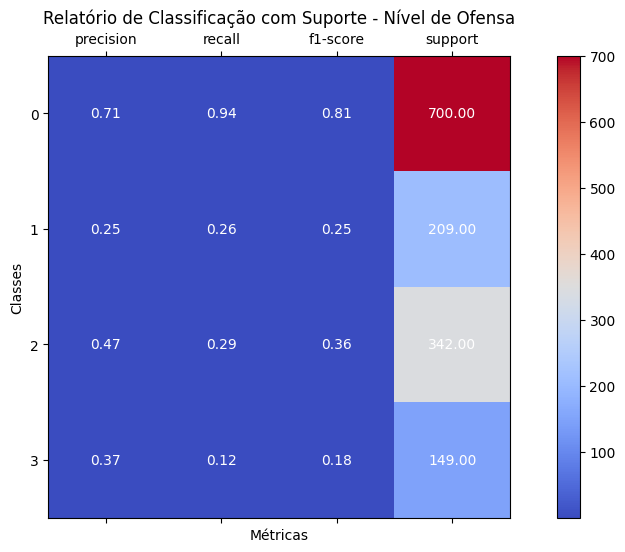

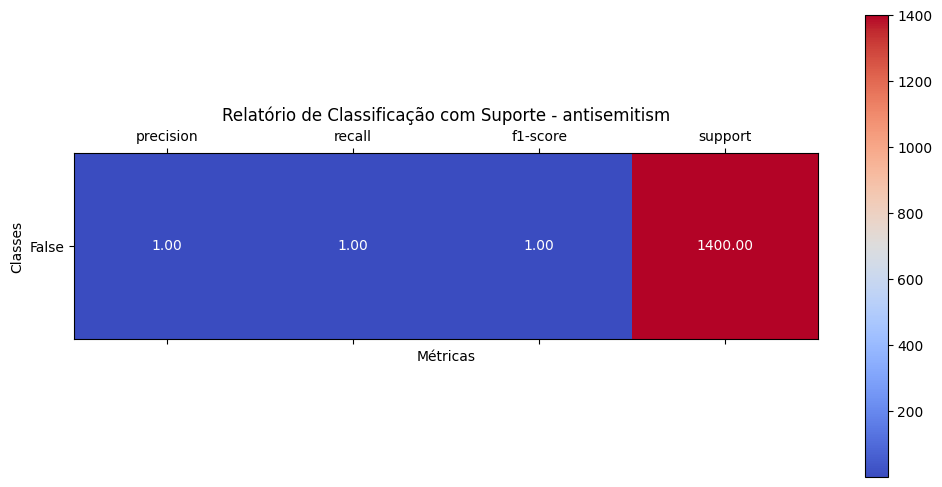

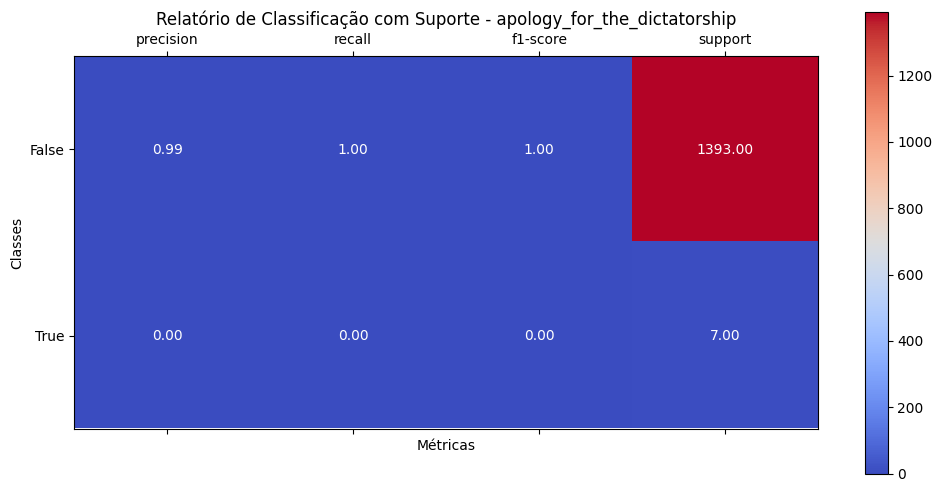

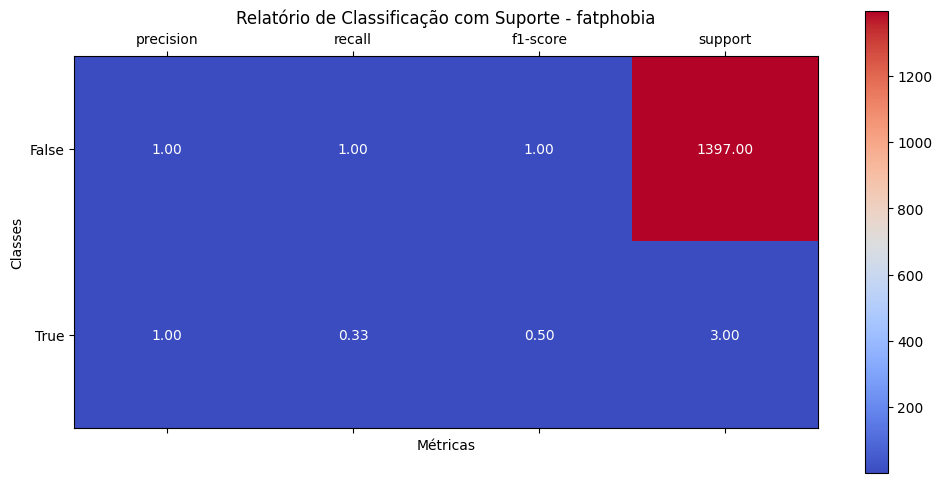

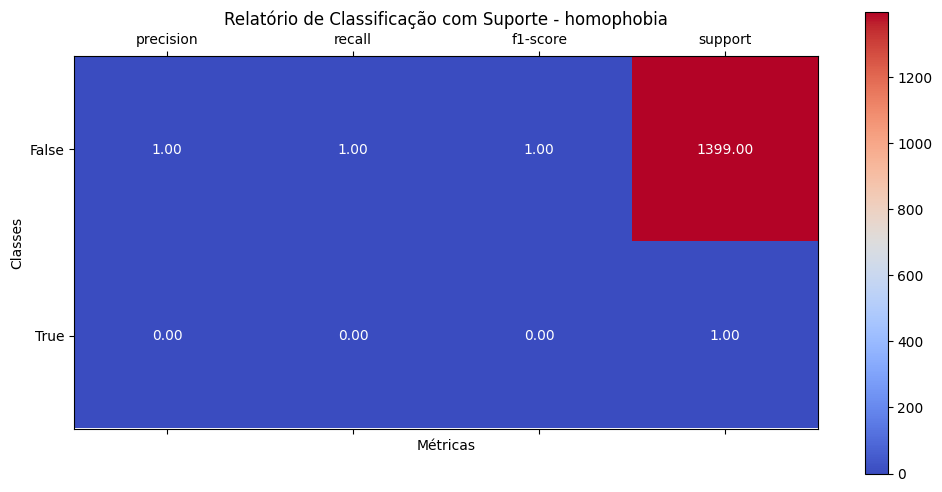

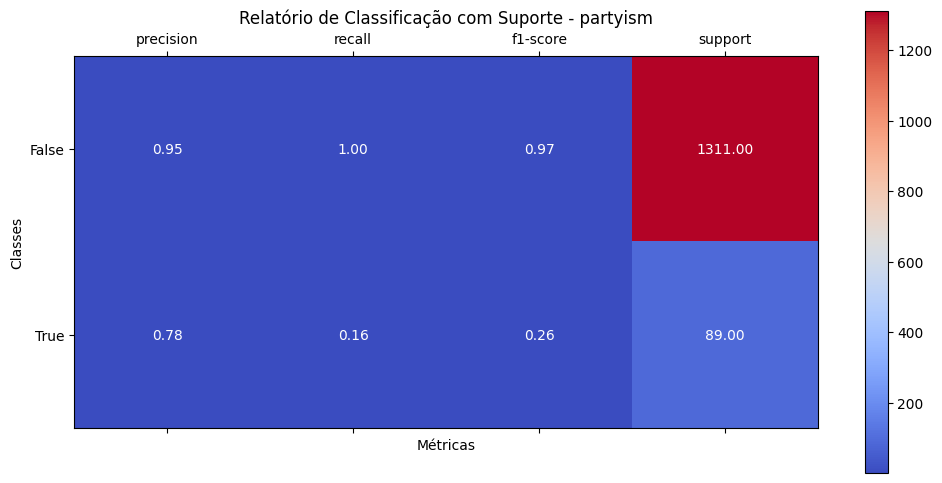

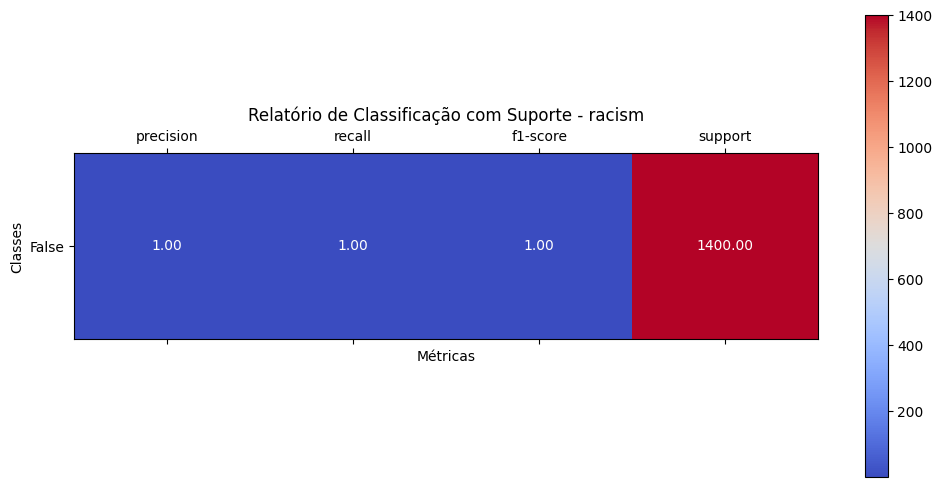

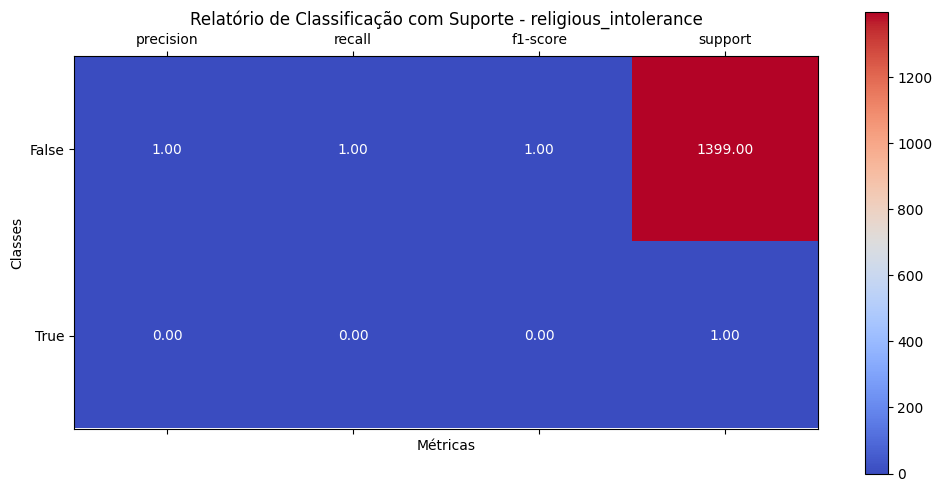

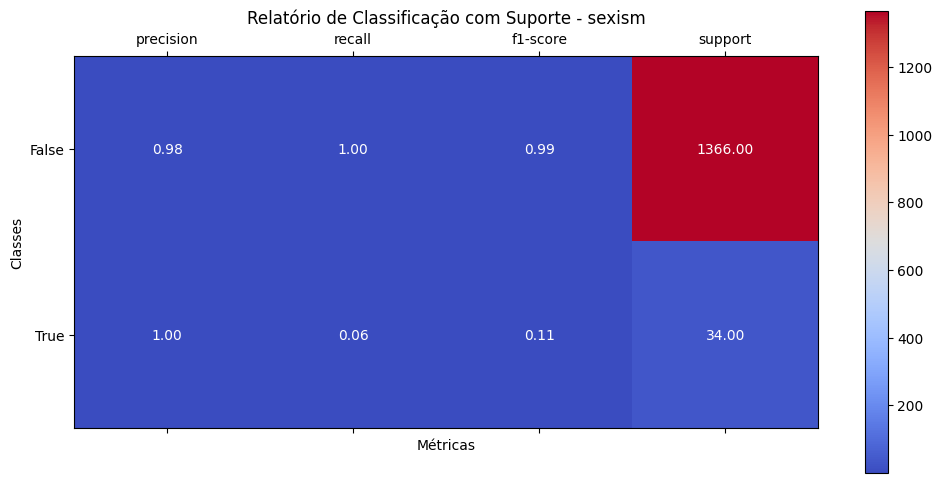

In [ ]:
# Relatório de classificação para nível de ofensa
relatorio_nivel_ofensa = classification_report(test_data['label_level'], predictions_level, output_dict=True, zero_division=0)

# Plota o relatório de classificação para nível de ofensa
plotar_relatorio_classificacao_com_suporte(relatorio_nivel_ofensa, 'Nível de Ofensa')

# Gera relatório de classificação para cada tipo de ofensa
for i, coluna in enumerate(y_types.columns):  # Loop que navega pelos tipos de ofensa
    relatorio_tipo_ofensa = classification_report(test_data[coluna], predictions_types[:, i], output_dict=True, zero_division=0)
    # Plota o relatório de classificação
    plotar_relatorio_classificacao_com_suporte(relatorio_tipo_ofensa, coluna)


#### Conclusão
O modelo CatBoost foi utilizado para a classificação de níveis e tipos de ofensa, apresentando um desempenho geral com uma acurácia de 0.59 para a previsão de níveis de ofensa. A classe 0 mostrou um bom desempenho, com uma precisão de 0.71 e um recall de 0.94, indicando uma capacidade eficaz de identificar comentários sem ofensas. Contudo, as classes 1, 2 e 3 apresentaram desafios significativos, com a classe 1 tendo uma precisão de 0.25 e recall de 0.26, o que sugere dificuldades em detectar ofensas de nível 1.

Nos relatórios de classificação para os tipos de ofensa, o CatBoost se destacou na detecção de antisemitismo e racismo, alcançando uma precisão de 1.00, mas isso se deve à falta de amostras positivas em algumas dessas categorias, refletindo uma limitação na variabilidade dos dados. Entretanto, a classe 'apology_for_the_dictatorship' apresentou uma precisão, recall e F1-score de 0.00, indicando que o modelo não conseguiu identificar nenhuma verdadeira ofensa nessa categoria.

As classes 'fatphobia' e 'homophobia' também tiveram desempenho variado, com a classe 'fatphobia' alcançando uma precisão de 1.00, mas o recall de 0.33 mostra dificuldades em detectar ofensas verdadeiras. A classe 'partyism' demonstrou um desempenho misto, com uma precisão de 0.78 e um recall de 0.16, tendo dificuldade na identificação de ofensas nesta categoria.

O tempo total de execução para as previsões foi de 9 minutos, sendo o maior tempo de execução entre todos os métodos utilizados.

## Considerações Finais

Após a avaliação dos modelos de Machine Learning aplicados à tarefa de identificar e classificar discursos de ódio e ofensas em comentários, foi possível observar que cada abordagem apresentou características e resultados distintos, refletindo suas particularidades na classificação dos níveis e tipos de ofensa.

Entre os métodos utilizados, o **XGBoost** destacou-se como o modelo mais eficaz para o problema em questão. Suas capacidades de generalização, a performance consistente nas métricas de avaliação e o tempo de execução demonstram sua robustez. Além disso, o modelo apresentou um bom equilíbrio entre precisão e recall, o que é crucial em um contexto onde falsos positivos e falsos negativos podem ter consequências significativas.

Contudo, é importante ressaltar as limitações do dataset utilizado. O **HateBR** é composto por aproximadamente 7.000 comentários, sendo que muitos deles apresentam características similares e um escopo limitado em termos de diversidade de ofensas. A escassez de exemplos variados, especialmente em categorias menos frequentes, como fatphobia e sexism, pode comprometer a capacidade dos modelos de aprender a distinguir nuances entre diferentes tipos de ofensa. Isso é evidente em algumas métricas, que apresentaram baixos índices de recall para essas categorias.

Em suma, enquanto o XGBoost se mostra como a melhor escolha para a tarefa em questão, a qualidade e diversidade dos dados permanecerão fatores críticos para o sucesso na identificação automática de discursos de ódio.

## Referências

1. [Dataset HateBR](https://huggingface.co/datasets/ruanchaves/hatebr)
2. [Word2Vec Treinado em Português que foi Utilizado no Modelo](http://nilc.icmc.usp.br/nilc/index.php/repositorio-de-word-embeddings-do-nilc)